In [ ]:
################
##IMPORT STUFF##
################

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
###########
#CONSTANTS#
###########
L = 1.000        # Luminosity
ab = 0.25       # Black Daisy Albedo
aw = 0.75       # White Daisy Albedo
ag = 0.5         # Ground Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.3      # Death Rate
delta_t = 0.9    # Time step

In [ ]:
###############
#ggplot enable#
###############

#This just makes the graph below looks like that#
plt.style.use('ggplot')


# Black Daisy World Only

In [ ]:
##dA/dT of black daisies
def v(A, L=L, ai = ab):
    ap = A*ai + (1-A)*ag                       # Planet Albedo
    Te = (L*(S/sigma)*(1-ap))**0.25            # Planet Temp
    T = (R*L*(S/sigma)*(ap-ai)+(Te**4))**0.25  # Black Daisy Temp
    b = 1-(0.003265*((273.15+Ti)-T)**2)        # Black Daisy Growth Rate
    return A*((1-A)*b-gamma)                   # Area of Black Daisy in next step

##Temp of planet with A0
def vta(A, L=L, ai = ab):
    ap = A*ai + (1-A)*ag                       # Planet Albedo
    Te = (L*(S/sigma)*(1-ap))**0.25            # Planet Temp
    return Te

##Generates a bunch of values##
def traj(A0, dt=0.01, duration=10.5, L=L, ai = ab):
    t = np.arange(0, duration, dt)
    pos = np.zeros(t.shape)
    A = A0
    for i in range(len(t)):
        pos[i] = A
        A += v(A, L=L, ai = ai)*dt
    return t, pos

##Generates time with temperature with A0 as input##
def time_temp(A0, dt=0.01, duration=10.5, L=L, ai = ab):
    t = np.arange(0, duration, dt)
    pos = np.zeros(t.shape)
    temp = np.zeros(t.shape) #temperature shape
    A = A0
    for i in range(len(t)):
        pos[i] = A
        A += v(A, L=L, ai = ai)*dt
        temp[i] = vta(A, L=L, ai = ai)
    return t, temp

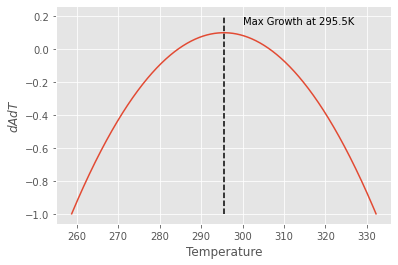

In [ ]:
###########################################
#  Daisy Coverage vs Surface Temperature  #
###########################################
#Ideal temp
ideal_t = 295.5
#Init initial area because why not
A0 = 0.5
#Give me a range of temperatures
t_range = np.arange(200,500, 0.1)
#Calculate the respective growth in that surface temperature
growth_b = 1-(0.003265*(ideal_t-t_range)**2)

#Calculate dAdt
dAdt = A0*(growth_b*(1-A0)-gamma)
#Limits the y-axis to be arbiturary as dAdT cannot be less than -1
dAdt_mask = dAdt >= -1
dAdt_new = dAdt[dAdt_mask]
t_range_new = t_range[dAdt_mask]

#plot
plt.plot(t_range_new, dAdt_new)
plt.xlabel("Temperature")
plt.ylabel("$dAdT$")
plt.vlines(ideal_t, ymin = -1.0, ymax = 0.2,linestyle = 'dashed')
plt.text(300,0.15, "Max Growth at 295.5K")
plt.show()

[0.01       0.01002449 0.01004904 ... 0.10255132 0.10255132 0.10255132]


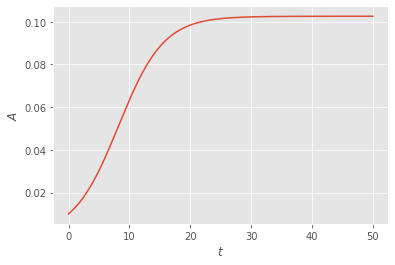

In [ ]:

###########################################
#2.1 plotting black daisy coverage vs time#
###########################################

t, pos = traj(0.01, dt=0.01, duration=50, L=L)
plt.plot(t, pos)
plt.xlabel('$t$')
plt.ylabel('$A$')
print(pos)
plt.show()

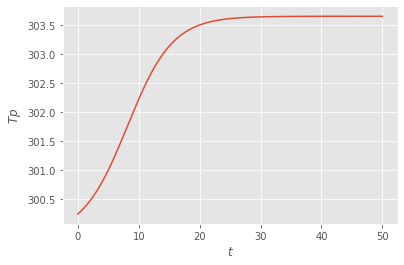

In [ ]:
##################################################
#2.2 Plot the planet temperature (Tp) vs time (t)#
##################################################

t1, temp1 = time_temp(0.01, dt=0.01, duration=50, L=L)
plt.plot(t1, temp1)
plt.xlabel('$t$')
plt.ylabel('$Tp$')
plt.show()

[0.01       0.01006409 0.01012858 ... 0.28587967 0.28587967 0.28587967]


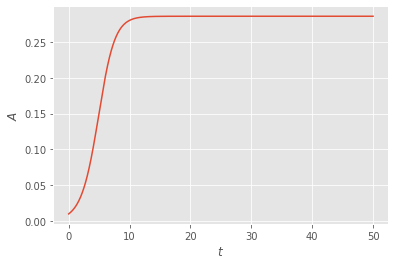

In [ ]:
###################################################
#                                                 #
#2.3 Evolution of a planet with only white daisies#
#                                                 #
###################################################

############################################
#2.31 plotting white daisy coverage vs time#
############################################
t, pos = traj(0.01, dt=0.01, duration=50, L=L, ai = aw)
plt.plot(t, pos)
plt.xlabel('$t$')
plt.ylabel('$A$')
print(pos)
plt.show()


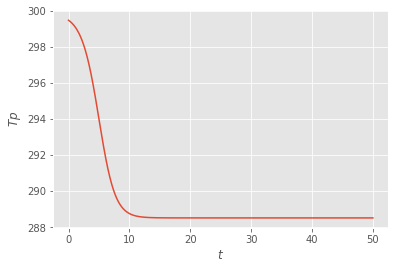

In [ ]:
###################################################
#2.32 Plot the planet temperature (Tp) vs time (t)#
###################################################

t4, temp4 = time_temp(0.01, dt=0.01, duration=50, L=L, ai = aw)
plt.plot(t4, temp4)
plt.xlabel('$t$')
plt.ylabel('$Tp$')
plt.show()

In [ ]:
#########################################################
#2.4  Evolution of a planet with black and white daisies#
#########################################################
###########
#CONSTANTS#
###########
# L = 1.00        # Luminosity
# ab = 0.25       # Black Daisy Albedo
# aw = 0.75       # White Daisy Albedo
# ag = 0.5         # Ground Albedo
# R = 0.2          # Insulation Constant
# S = 917          # Solar Constant
# sigma = 5.67e-8  # Stefan-Boltzmann Constant
# Ti = 22.5        # Ideal Growth Temperature
# gamma = 0.3      # Death Rate
# delta_t = 0.01    # Time step
# A0b = 0.33          # Initial Area black daisies
# A0w = 0.65         # Initial Area white daisies


def two_four(duration = 5050, L = 1.00, ab = 0.25, aw = 0.75, ag = 0.5, R = 0.2, S = 917, sigma = 5.67e-8, Ti = 22.5, gamma = 0.3, delta_t = 0.01, A0b = 0.33, A0w = 0.65):

  t = 0
  t_list = []
  Ab_list = []
  Aw_list = []
  Te_list = []

  for i in range(duration):
    t_list.append(t + i*delta_t)
    Ab_list.append(A0b)
    Aw_list.append(A0w)

    #Initial Earth Temp#
    ap = A0b*ab + (1-A0b-A0w)*ag + A0w*aw 
    Te = (L*(S/sigma)*(1-ap))**0.25
    Te_list.append(Te)

    #Black Flower Growth#
    Tb = (R*L*(S/sigma)*(ap-ab)+(Te**4))**0.25  # Black Daisy Temp
    gb = 1-(0.003265*((273.15+Ti)-Tb)**2)        # Black Daisy Growth Rate
    agb = A0b*((1-A0b-A0w)*gb-gamma)            # ACTUAL Black Daisy Growth 
    A0b += agb * delta_t
    #White Flower Growth#
    Tw = (R*L*(S/sigma)*(ap-aw)+(Te**4))**0.25  # White Daisy Temp
    gw = 1-(0.003265*((273.15+Ti)-Tw)**2)        # White Daisy Growth Rate
    agw = A0w*((1-A0b-A0w)*gw-gamma)            # ACTUAL Black Daisy Growth
    A0w += agw * delta_t

  return t_list, Aw_list, Ab_list, Te_list

t_list, Aw_list, Ab_list, Te_list = two_four()

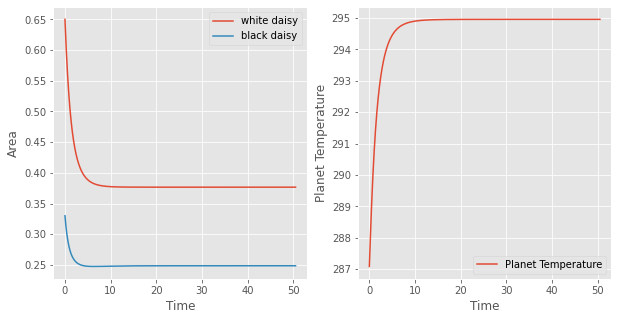

In [ ]:
############################################################
#Plotting Dual Daisy World against Time and Tp against Time#
############################################################

fig, axes = plt.subplots(ncols=2, nrows=1,figsize=(10,5))
ax1, ax2 = axes.ravel()

ax1.plot(t_list, Aw_list, label = 'white daisy')
ax1.plot(t_list, Ab_list, label = 'black daisy')
ax1.set_xlabel("Time")
ax1.set_ylabel("Area")
ax1.legend()

ax2.plot(t_list, Te_list, label = "Planet Temperature")
ax2.set_xlabel("Time")
ax2.set_ylabel("Planet Temperature")
ax2.legend()

plt.show()

In [ ]:
#######################################################################
#Finding steady states where both white and black don't completely die#
#######################################################################

#This runs a full time-iterated simulation for every value of Luminosity
#From 0.5 to 1.7, if by the end both daisies don't die, append that value
#To be used later

THRESHOLD = 0.1 #Min amount of daisies available (anything below this value = Dead)
steady_list = []
for i in range(50, 170):
  n_L = i / 100
  t_list, Aw_list, Ab_list, Te_list = two_four(L = n_L)
  if Ab_list[-1] > THRESHOLD and Aw_list[-1] > THRESHOLD:
    steady_list.append(n_L)

In [ ]:

for Lumi in steady_list:
  break
  t_list, Aw_list, Ab_list, Te_list = two_four(L = Lumi)
  plt.subplot(1,2,1)
  plt.plot(t_list, Aw_list, label = 'white')
  plt.plot(t_list, Ab_list, label = 'black')
  plt.title(f"Luminosity: {Lumi}")
  plt.xlim(0, t_list[-1])
  plt.ylim(-0.1, 1.1)
  plt.xlabel('$t$')
  plt.ylabel('$A$')
  plt.legend()
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(t_list, Te_list)
  plt.show()

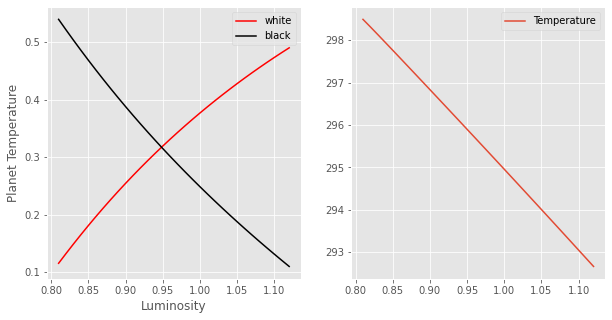

In [ ]:
################################################################
#Plotting steady state black area white area against luminosity#
################################################################

######################################################
#Plotting steady state temperature against luminosity#
######################################################

###########################
#This answers Section 2.5 #
###########################

steady_Aw = []
steady_Ab = []
steady_Te = []

#For each stable state of "Luminosity" where both daisies don't die
#Grab the "stable state" from both black and white daisies and append
#To the list for processing later
#Together with planet temperature
for Lumi in steady_list:
  t_list, Aw_list, Ab_list, Te_list = two_four(L = Lumi)
  steady_Aw.append(Aw_list[-1])
  steady_Ab.append(Ab_list[-1])
  steady_Te.append(Te_list[-1])


fig, axes = plt.subplots(ncols=2, nrows=1,figsize=(10,5))
ax1, ax2 = axes.ravel()


ax1.plot(steady_list, steady_Aw, label = 'white', color = 'r')
ax1.plot(steady_list, steady_Ab, label = 'black', color = 'k')
ax1.legend()
ax1.set_xlabel("Luminosity")
ax1.set_ylabel("Area")

ax2.plot(steady_list, steady_Te, label = 'Temperature')
ax1.set_xlabel("Luminosity")
ax1.set_ylabel("Planet Temperature")
ax2.legend()

plt.show()


In [ ]:


####################################################
#3.1   Black Daisy planet versus White Daisy planet#
####################################################

def three_one(duration = 5050, L = 1.00, ab = 0.25, aw = 0.75, ag = 0.5, R = 0.2, S = 917, sigma = 5.67e-8, Ti = 22.5, gamma = 0.3, delta_t = 0.01, A0b = 0.33, A0w = 0.65, Dual = False):
  t = 0
  t_list = []
  Ab_list = []
  Aw_list = []
  Te_list = []

  if Dual:
    for i in range(duration):
      t_list.append(t + i*delta_t)
      Ab_list.append(A0b)
      Aw_list.append(A0w)

      #Initial Earth Temp#
      ap = A0b*ab + (1-A0b-A0w)*ag + A0w*aw 
      Te = (L*(S/sigma)*(1-ap))**0.25
      Te_list.append(Te)

      #Black Flower Growth#
      Tb = (R*L*(S/sigma)*(ap-ab)+(Te**4))**0.25  # Black Daisy Temp
      gb = 1-(0.003265*((273.15+Ti)-Tb)**2)        # Black Daisy Growth Rate
      agb = A0b*((1-A0b-A0w)*gb-gamma)            # ACTUAL Black Daisy Growth 
      A0b += agb * delta_t

      #White Flower Growth#
      Tw = (R*L*(S/sigma)*(ap-aw)+(Te**4))**0.25  # White Daisy Temp
      gw = 1-(0.003265*((273.15+Ti)-Tw)**2)        # White Daisy Growth Rate
      agw = A0w*((1-A0b-A0w)*gw-gamma)            # ACTUAL Black Daisy Growth
      A0w += agw * delta_t
  else:
    for i in range(duration):
      t_list.append(t + i*delta_t)
      Ab_list.append(A0b)

      #Initial Earth Temp#
      ap = A0b*ab + (1-A0b)*ag
      Te = (L*(S/sigma)*(1-ap))**0.25
      Te_list.append(Te)

      #Black Flower Growth#
      Tb = (R*L*(S/sigma)*(ap-ab)+(Te**4))**0.25  # Black Daisy Temp
      gb = 1-(0.003265*((273.15+Ti)-Tb)**2)        # Black Daisy Growth Rate
      agb = A0b*((1-A0b)*gb-gamma)            # ACTUAL Black Daisy Growth 
      A0b += agb * delta_t

  if Dual:
    return t_list, Aw_list, Ab_list, Te_list
  else:
    return t_list, Ab_list, Te_list

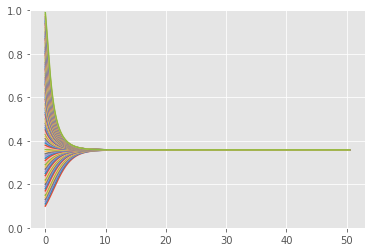

In [ ]:
####################################################################
#Finding steady states of black daisy planet only with treshold 0.1#
####################################################################
################
#Section 3.1 Q1#
################

stead_initAb = []
stead_Areab = []
stead_Tb = []
for area in range(10,100):
  area = area/100
  t_list, Ab_list, Te_list = three_one(A0b = area, L = 0.9)
  if Ab_list[-1] > 0.1:
    stead_Areab.append(Ab_list[-1])
    stead_initAb.append(area)
    stead_Tb.append(Te_list[-1])
    plt.plot(t_list, Ab_list)
  

plt.ylim(0,1)
plt.show()

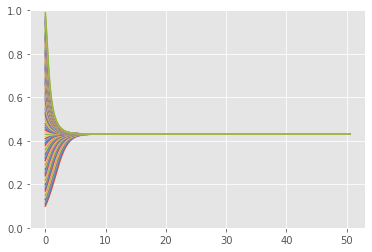

In [ ]:
####################################################################
#Finding steady states of white daisy planet only with treshold 0.1#
####################################################################
################
#Section 3.1 Q2#
################
stead_Areaw = []
stead_initAw = []
stead_Tw = []
for area in range(10,100):
  area = area/100
  t_list, Ab_list, Te_list = three_one(A0b = area, ab = 0.75, L = 1.1)
  if Ab_list[-1] > 0.1:
    stead_Areaw.append(Ab_list[-1])
    stead_initAw.append(area)
    stead_Tw.append(Te_list[-1])
    plt.plot(t_list, Ab_list)
  

plt.ylim(0,1)
plt.show()

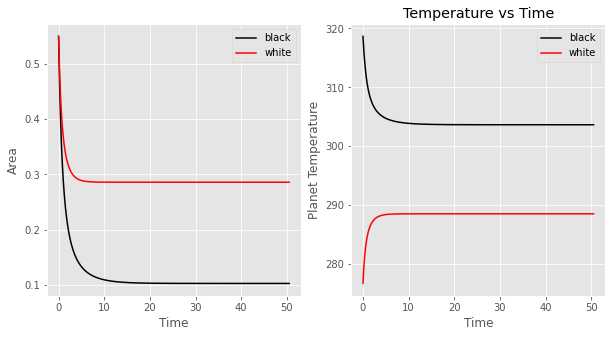

In [ ]:
#########################
#Plotting 3.1 question 3#
#########################

A0w = stead_initAw[45]
A0b = stead_initAb[45]

t_list, Ab_list, Teb_list = three_one(A0b = A0b)
t_list, Aw_list, Tew_list = three_one(A0b = A0w, ab = 0.75)

fig, axes = plt.subplots(ncols=2, nrows=1,figsize=(10,5))
ax1, ax2 = axes.ravel()

ax1.plot(t_list, Ab_list, label = 'black', color = 'k')
ax1.plot(t_list, Aw_list, label = 'white', color = 'r')
ax1.legend()
ax1.set_xlabel("Time")
ax1.set_ylabel("Area")


ax2.set_title('Temperature vs Time')
ax2.plot(t_list, Teb_list, label = 'black', color = 'k')
ax2.plot(t_list, Tew_list, label = 'white', color = 'r')
ax2.legend()
ax2.set_xlabel("Time")
ax2.set_ylabel("Planet Temperature")

plt.show()

#They don't reach the same result
#Black decrease = temp decrease
#White decrease = temp increase

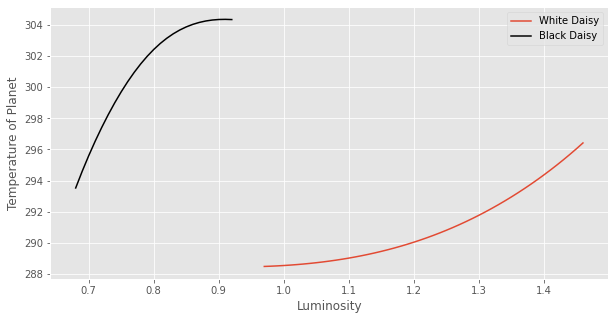

'\nQ4a) The range of Luminosity can be seen in the graph\nbasically, anywhere with the graph = stable luminosity\n'

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=1,figsize=(10,5))

##############################################
#Vary sun luminosity but temp change Q4 BLACK#
##############################################
stead_initAb = []
stead_Lumib = []
stead_Tb = []

for lumi in range(50,300):
  lumi = lumi/100
  t_list, Ab_list, Te_list = three_one(L = lumi)
  if Te_list[-20] == Te_list[-1]:
    if Ab_list[-1] > 0.1:
      stead_Lumib.append(lumi)
      stead_Tb.append(Te_list[-1])
    #plt.plot(t_list, Ab_list)

##############################################
#Vary sun luminosity but temp change Q4 WHITE#
##############################################
stead_initAw = []
stead_Lumiw = []
stead_Tw = []

for lumi in range(50,300):
  lumi = lumi/100
  t_list, Aw_list, Te_list = three_one(L = lumi, ab=0.75)
  if Te_list[-20] == Te_list[-1]:
    if Aw_list[-1] > 0.1:
      stead_Lumiw.append(lumi)
      stead_Tw.append(Te_list[-1])
      #plt.plot(t_list, Ab_list)


axes.plot(stead_Lumiw, stead_Tw, label = "White Daisy")
axes.plot(stead_Lumib, stead_Tb, label = "Black Daisy", color = 'k')
axes.set_xlabel('Luminosity')
axes.set_ylabel('Temperature of Planet')
axes.legend()
plt.show()

'''
Q4a) The range of Luminosity can be seen in the graph
basically, anywhere with the graph = stable luminosity
'''

0.6735913919630379


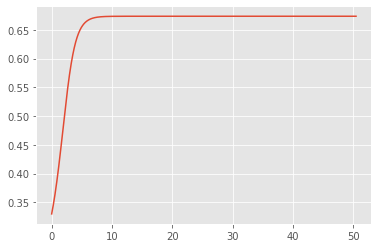

In [ ]:
#No idea why this code snippet is here, just leave it until i remember lmao#

t_list, Aw_list, Te_list = three_one(L = 1.4, ab=0.75)

plt.plot(t_list, Aw_list)
print(Aw_list[-1])

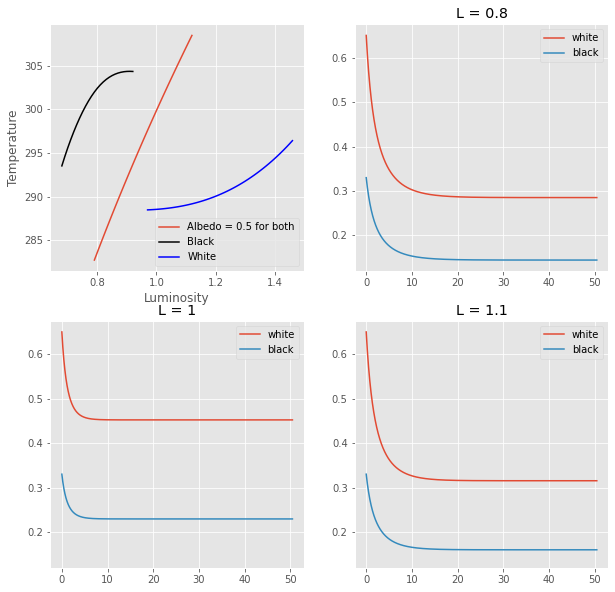

'\nS3.2 Q5: The Temperature increases linearly with no regulation\nbecause if daisies same albedo as ground, you can assume there is no\ndaisies on the planet.\n\n\n'

In [ ]:
#############################################
#                                           #
#3.2   A planet with black and white daisies#
#                                           #
#############################################

#################################
#Q5 Black and White albedo = 0.5#
#################################

stead_initAw = []
stead_initAb = []
stead_Lumi = []
stead_Tboth = []

for lumi in range(50,300):
  lumi = lumi/100
  t_list, Aw_list, Ab_list, Te_list = three_one(L = lumi, ab = 0.5, aw = 0.5, Dual = True)
  if Te_list[-20] == Te_list[-1]:
    if Aw_list[-1] > 0.1 and Ab_list[-1] > 0.1:
      stead_Lumi.append(lumi)
      stead_Tboth.append(Te_list[-1])
      #plt.plot(t_list, Ab_list)


fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(10,10))
ax1, ax2, ax3, ax4= axes.ravel()

ax1.plot(stead_Lumi, stead_Tboth, label = "Albedo = 0.5 for both")
ax1.plot(stead_Lumib, stead_Tb, label = "Black", color = 'k')
ax1.plot(stead_Lumiw, stead_Tw, label = "White", color = 'blue')
ax1.set_xlabel('Luminosity')
ax1.set_ylabel('Temperature')
ax1.legend()

t_list, Aw_list, Ab_list, Te_list = three_one(L = 0.8, ab = 0.5, aw = 0.5, Dual = True)
ax2.plot(t_list, Aw_list, label = 'white')
ax2.plot(t_list, Ab_list, label = "black")
ax2.set_title("L = 0.8")
ax2.legend()

t_list, Aw_list, Ab_list, Te_list = three_one(L = 1, ab = 0.5, aw = 0.5, Dual = True)
ax3.plot(t_list, Aw_list, label = 'white')
ax3.plot(t_list, Ab_list, label = "black")
ax3.set_title("L = 1")
ax3.legend()

t_list, Aw_list, Ab_list, Te_list = three_one(L = 1.1, ab = 0.5, aw = 0.5, Dual = True)
ax4.plot(t_list, Aw_list, label = 'white')
ax4.plot(t_list, Ab_list, label = "black")
ax4.set_title("L = 1.1")
ax4.legend()

ax2.get_shared_y_axes().join(ax2, ax3)
ax3.get_shared_y_axes().join(ax3, ax4)
plt.show()

'''
S3.2 Q5: The Temperature increases linearly with no regulation
because if daisies same albedo as ground, you can assume there is no
daisies on the planet.


'''


In [ ]:
############################
#Q6 Vary q and L increasing#
############################
# (T1 + 273)**4 =  q(A - A1) + (Te + 273)**4
## (T1 + 273)**4 - (Te + 273)**4 =  q(A - A1)
### ((T1 + 273)**4 - (Te + 273)**4)/(A - A1) =  q
#### T1 = local temperature of flower
#### A = albedo of planet, A1 = albedo of flower
##### qb = ((Tb + 273)**4 - (Te + 273)**4)/(ap - ab)



def three_two(duration = 5050, L = 1.00, ab = 0.25, aw = 0.75, ag = 0.5, R = 0.2, S = 917, sigma = 5.67e-8, Ti = 22.5, gamma = 0.3, delta_t = 0.01, A0b = 0.33, A0w = 0.65):
  t = 0
  t_list = []
  Ab_list = []
  Aw_list = []
  Te_list = []

  for i in range(duration):
    t_list.append(t + i*delta_t)
    Ab_list.append(A0b)
    Aw_list.append(A0w)

    #Initial Earth Temp#
    ap = A0b*ab + (1-A0b-A0w)*ag + A0w*aw 
    Te = (L*(S/sigma)*(1-ap))**0.25
    Te_list.append(Te)

    #Black Flower Growth#
    Tb = (R*L*(S/sigma)*(ap-ab)+(Te**4))**0.25  # Black Daisy Temp
    gb = 1-(0.003265*((273.15+Ti)-Tb)**2)        # Black Daisy Growth Rate
    agb = A0b*((1-A0b-A0w)*gb-gamma)            # ACTUAL Black Daisy Growth 
    A0b += agb * delta_t

    #White Flower Growth#
    Tw = (R*L*(S/sigma)*(ap-aw)+(Te**4))**0.25  # White Daisy Temp
    gw = 1-(0.003265*((273.15+Ti)-Tw)**2)        # White Daisy Growth Rate
    agw = A0w*((1-A0b-A0w)*gw-gamma)            # ACTUAL Black Daisy Growth
    A0w += agw * delta_t
  return t_list, Aw_list, Ab_list, Te_list

In [ ]:
############################
#Q6 Vary q and L increasing#
############################
pass

"\nQ7\nWhite daisies grow better than Black at L >= 1\nwhereas Black daises grow better than white at L < 1\n\n\nQ8\nThey increase / decrease the planet's temperature until both daisies have \ndA/dT = 0 \n\n"

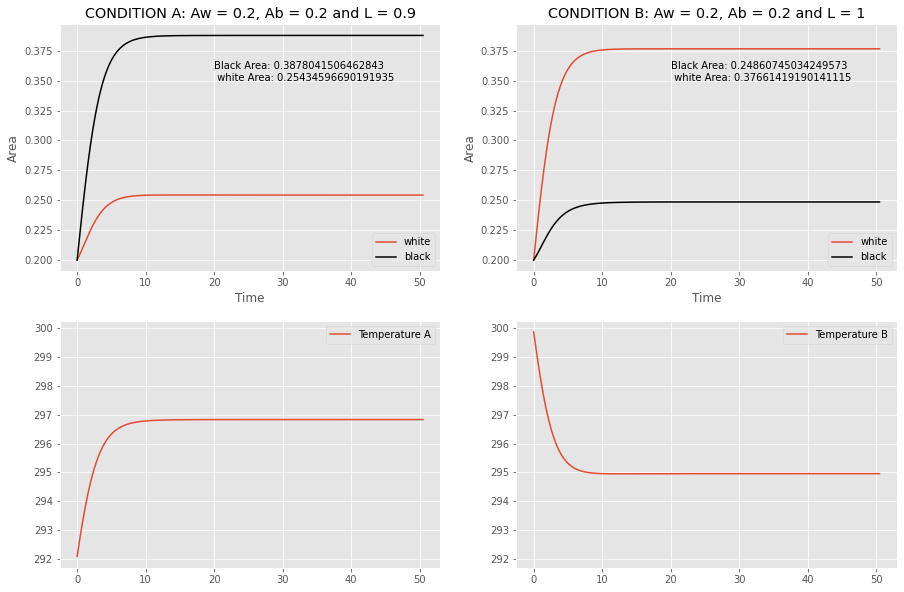

In [ ]:
######################################################################
#Q7 Explain how the planet reaches steady state in the two situations#
######################################################################
#Q7a: Aw = 0.2, Ab = 0.2 and L = 0.9
t_lista, Aw_lista, Ab_lista, Te_lista = three_two(L = 0.9, ab = 0.25, aw = 0.75, A0b = 0.2, A0w = 0.2)
#Q7b: Aw = 0.2, Ab = 0.2 and L = 1
t_listb, Aw_listb, Ab_listb, Te_listb = three_two(L = 1, ab = 0.25, aw = 0.75, A0b = 0.2, A0w = 0.2)


fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(15,10))

ax1, ax2, ax3, ax4 = axes.ravel()

ax1.plot(t_lista, Aw_lista, label = "white")
ax1.plot(t_lista, Ab_lista, label = "black", color = 'k')
ax1.legend()
ax1.set_xlabel('Time')
ax1.set_ylabel('Area')
ax1.set_title(f"CONDITION A: Aw = 0.2, Ab = 0.2 and L = 0.9")
ax1.text(20,0.35, f"Black Area: {Ab_lista[-1]}\n white Area: {Aw_lista[-1]}")
ax2.plot(t_listb, Aw_listb, label = "white")
ax2.plot(t_listb, Ab_listb, label = "black", color = 'k')
ax2.legend()
ax2.set_xlabel('Time')
ax2.set_ylabel('Area')
ax2.set_title("CONDITION B: Aw = 0.2, Ab = 0.2 and L = 1")
ax2.text(20,0.35, f"Black Area: {Ab_listb[-1]}\n white Area: {Aw_listb[-1]}")
ax3.plot(t_lista, Te_lista, label = "Temperature A")
ax3.legend()

ax4.plot(t_listb, Te_listb, label = "Temperature B")
ax4.legend()

ax1.get_shared_y_axes().join(ax1, ax2)
ax3.get_shared_y_axes().join(ax3, ax4)



'''
Q7
White daisies grow better than Black at L >= 1
whereas Black daises grow better than white at L < 1


Q8
They increase / decrease the planet's temperature until both daisies have 
dA/dT = 0 

'''

In [ ]:
############
#HYSTERESIS#
############
##############################################################
#Function for changing Luminosity WHILE simulation is running#
##############################################################

##### for whit daisies

L = 1.00        # Luminosity
ag = 0.5         # Ground Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.3      # Death Rate
delta_t = 0.01    # Time step
A0b = 0.33          # Initial Area black daisies
A0w = 0.65         # Initial Area white daisies




def whiteroses(A,time,dt,L_sup,L=0.8, ai = 0.75):
  L_interval=(L_sup-L)/(time/dt)
  L_list=[]
  time=np.arange(0,time,dt)
  A_list=[]
  T_list=[]

  def dT_e(A,ai=ai):
    a_e=A*ai+(1-A)*ag
    T_e=(S*L/sigma*(1-a_e))**0.25
    T_d=((R*S*L/sigma)*(a_e-ai)+T_e**4)**0.25
    b=1-0.003265*(Ti+273.15-T_d)**2
    if b < 0:
      b = 0
    return A*((1-A)*b-gamma),T_e

  for i in time:
    L+=L_interval
    L_list.append(L)
    A_list.append(A)
    dAdt,T=dT_e(A)
    A+=dAdt*dt
    T_list.append(T)
    
  return time,A_list,T_list,L_list


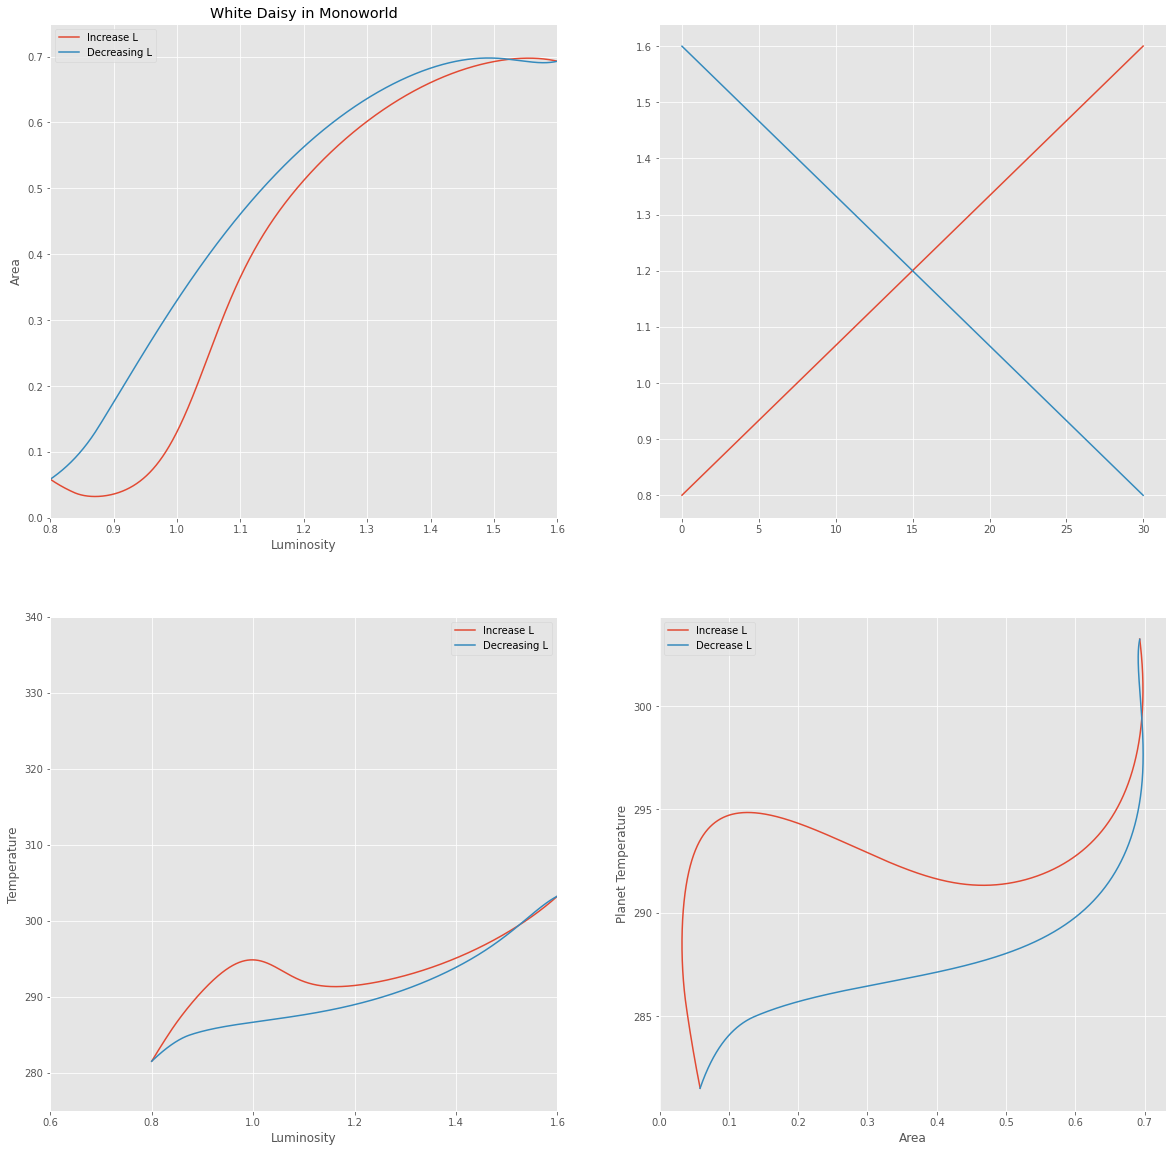

In [ ]:
##################################################################
#Function for changing Luminosity WHILE simulation is running Q11#
##################################################################

HL = 1.6
LL = 0.8

time,A_list,T_list,L_list = whiteroses(0.5,30,0.01,HL,L=LL)
timea,A_lista,T_lista,L_lista = whiteroses(A_list[-1],30,0.01,LL,L=HL)

time,A_list,T_list,L_list = whiteroses(A_lista[-1],30,0.01,HL,L=LL)
timea,A_lista,T_lista,L_lista = whiteroses(A_list[-1],30,0.01,LL,L=HL)

#Simulate world with no daisies#
timeb,A_listb,T_listb,L_listb = whiteroses(0,30,0.01,LL,L=HL, ai = 0)

fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(20,20))
ax1, ax3, ax2, ax4 = axes.ravel()

ax1.plot(L_list, A_list, label = "Increase L")
ax1.plot(L_lista, A_lista, label = "Decreasing L")
#ax1.plot(L_listb, A_listb, label = "no flower decreasing L")
ax1.legend()
ax1.set_ylim(0,0.75)
ax1.set_xlim(0.8,HL)
ax1.set_xlabel('Luminosity')
ax1.set_ylabel('Area')
ax1.set_title("White Daisy in Monoworld")

ax2.plot(L_list, T_list, label = "Increase L")
ax2.plot(L_lista, T_lista, label = "Decreasing L")
#ax2.plot(L_listb, T_listb, label = "no flower decreasing L")
ax2.legend()
#ax2.set_ylim(10+273,80+273)
ax2.set_xlim(0.6,HL)
ax2.set_ylim(275,340)
ax2.set_xlabel('Luminosity')
ax2.set_ylabel('Temperature')

ax3.plot(time, L_list, label = "Increase L")
ax3.plot(timea, L_lista, label = "Decreasing L")

ax4.plot(A_list, T_list, label = 'Increase L')
ax4.plot(A_lista, T_lista, label = 'Decrease L')
ax4.set_xlabel("Area")
ax4.set_ylabel("Planet Temperature")
ax4.legend()

from google.colab import files
fn = 'Mono White HY.png'
plt.savefig(fn, bbox_inches = 'tight', dpi = 300)
#files.download(fn)


plt.show()

##Q12
##At lower L, rate of increase of temp
##is around the same
##At higher L, rate of increase of temp
##is lower with 1 daisy because white reflects
##More light

##Q13
##No????

##Q14
##????? Icecaps that melt at high L to cool the overall planet down?

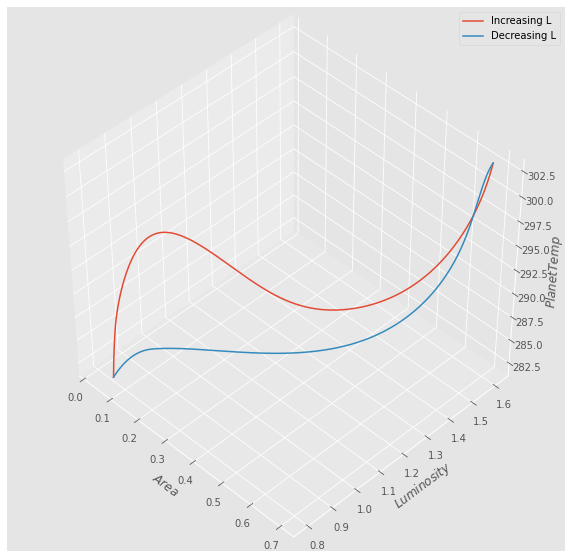

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
#######################################################################
#3D Plot of White Daisy Only planet, Luminosity vs Area vs Planet Temp#
#######################################################################

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(A_list,L_list,T_list, label = 'Increasing L')
ax.plot(A_lista,L_lista,T_lista, label = 'Decreasing L')
ax.set_xlabel('$Area$')
ax.set_zlabel('$Planet Temp$')
ax.set_ylabel('$Luminosity$')
ax.legend()
ax.view_init(elev=45, azim=-45) #Change elev and Azim for views


In [ ]:
#############################################
#                                           #
# 3.3.1 Equilibria: The State Space Picture #
#                                           #
#############################################

'''
a) The value of dA/dT = 0 when its equilibrium, where A =/= 0.
b) Yes, because at all values of Area, there is a tendency to increase / decrease
to the point where dA/dT = 0
c) yes??
d) TE Plot gives you the history of that system, given infinite t, steady state can be seen
State Space can tell us how a system will behave at any given time (since it is 
dependent on Area).

'''


#############################################
#                                           #
# 3.3.2 Equilibria: The State Space Picture #
#                                           #
#############################################

'''
a) Indicates the direction of the change in area for Ab and Aw within the state space
b) Equilibrium point is harder to see, where 1 daisy is marked by dA/dT = 0
whereas for this 2D plot is where the arrows converge to
c) 
d) vector = 0, when arrows are pointing towards a point?
e) No. Some points any increase in any direction will have a new equilibirum point

'''



'\na) Indicates the direction of the change in area for Ab and Aw within the state space\nb) Equilibrium point is harder to see, where 1 daisy is marked by dA/dT = 0\nwhereas for this 2D plot is where the arrows converge to\nc) \nd) vector = 0, when arrows are pointing towards a point?\ne) No. Some points any increase in any direction will have a new equilibirum point\n\n'

In [ ]:
#################################################################################
#Function for changing Luminosity WHILE simulation is running FOR 2 DAISY PLANET#
#################################################################################
L = 1.500        # Luminosity
ab = 0.25        # Black Daisy Albedo
aw = 0.75        # White Daisy Albedo
ag = 0.5         # Ground Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.3      # Death Rate


def greydaisies(Aw,Ab,time,dt,L_sup,L=0.8, aw = 0.75, ab = 0.25):
  L_interval=(L_sup-L)/(time/dt)
  L_list=[]
  time=np.arange(0,time,dt)
  Aw_list=[]
  Ab_list=[]
  T_list=[]

  def dT_e(A,a_e,ai=aw):
    T_d=((R*S*L/sigma)*(a_e-ai)+T_e**4)**0.25
    b=1-0.003265*(Ti+273.15-T_d)**2
    if b < 0:
      b = 0
    return A*((1-A)*b-gamma)

  for i in time:
    L+=L_interval
    L_list.append(L)

    a_e=Aw*aw+(1-Aw-Ab)*ag+Ab*ab
    T_e=(S*L/sigma*(1-a_e))**0.25

    T_list.append(T_e)
    Aw_list.append(Aw)
    Ab_list.append(Ab)

    dAwdt=dT_e(Aw, a_e, ai = aw)
    dAbdt=dT_e(Ab, a_e, ai = ab)

    Aw+=dAwdt*dt
    Ab+=dAbdt*dt
    
  return time,Aw_list,Ab_list,T_list,L_list

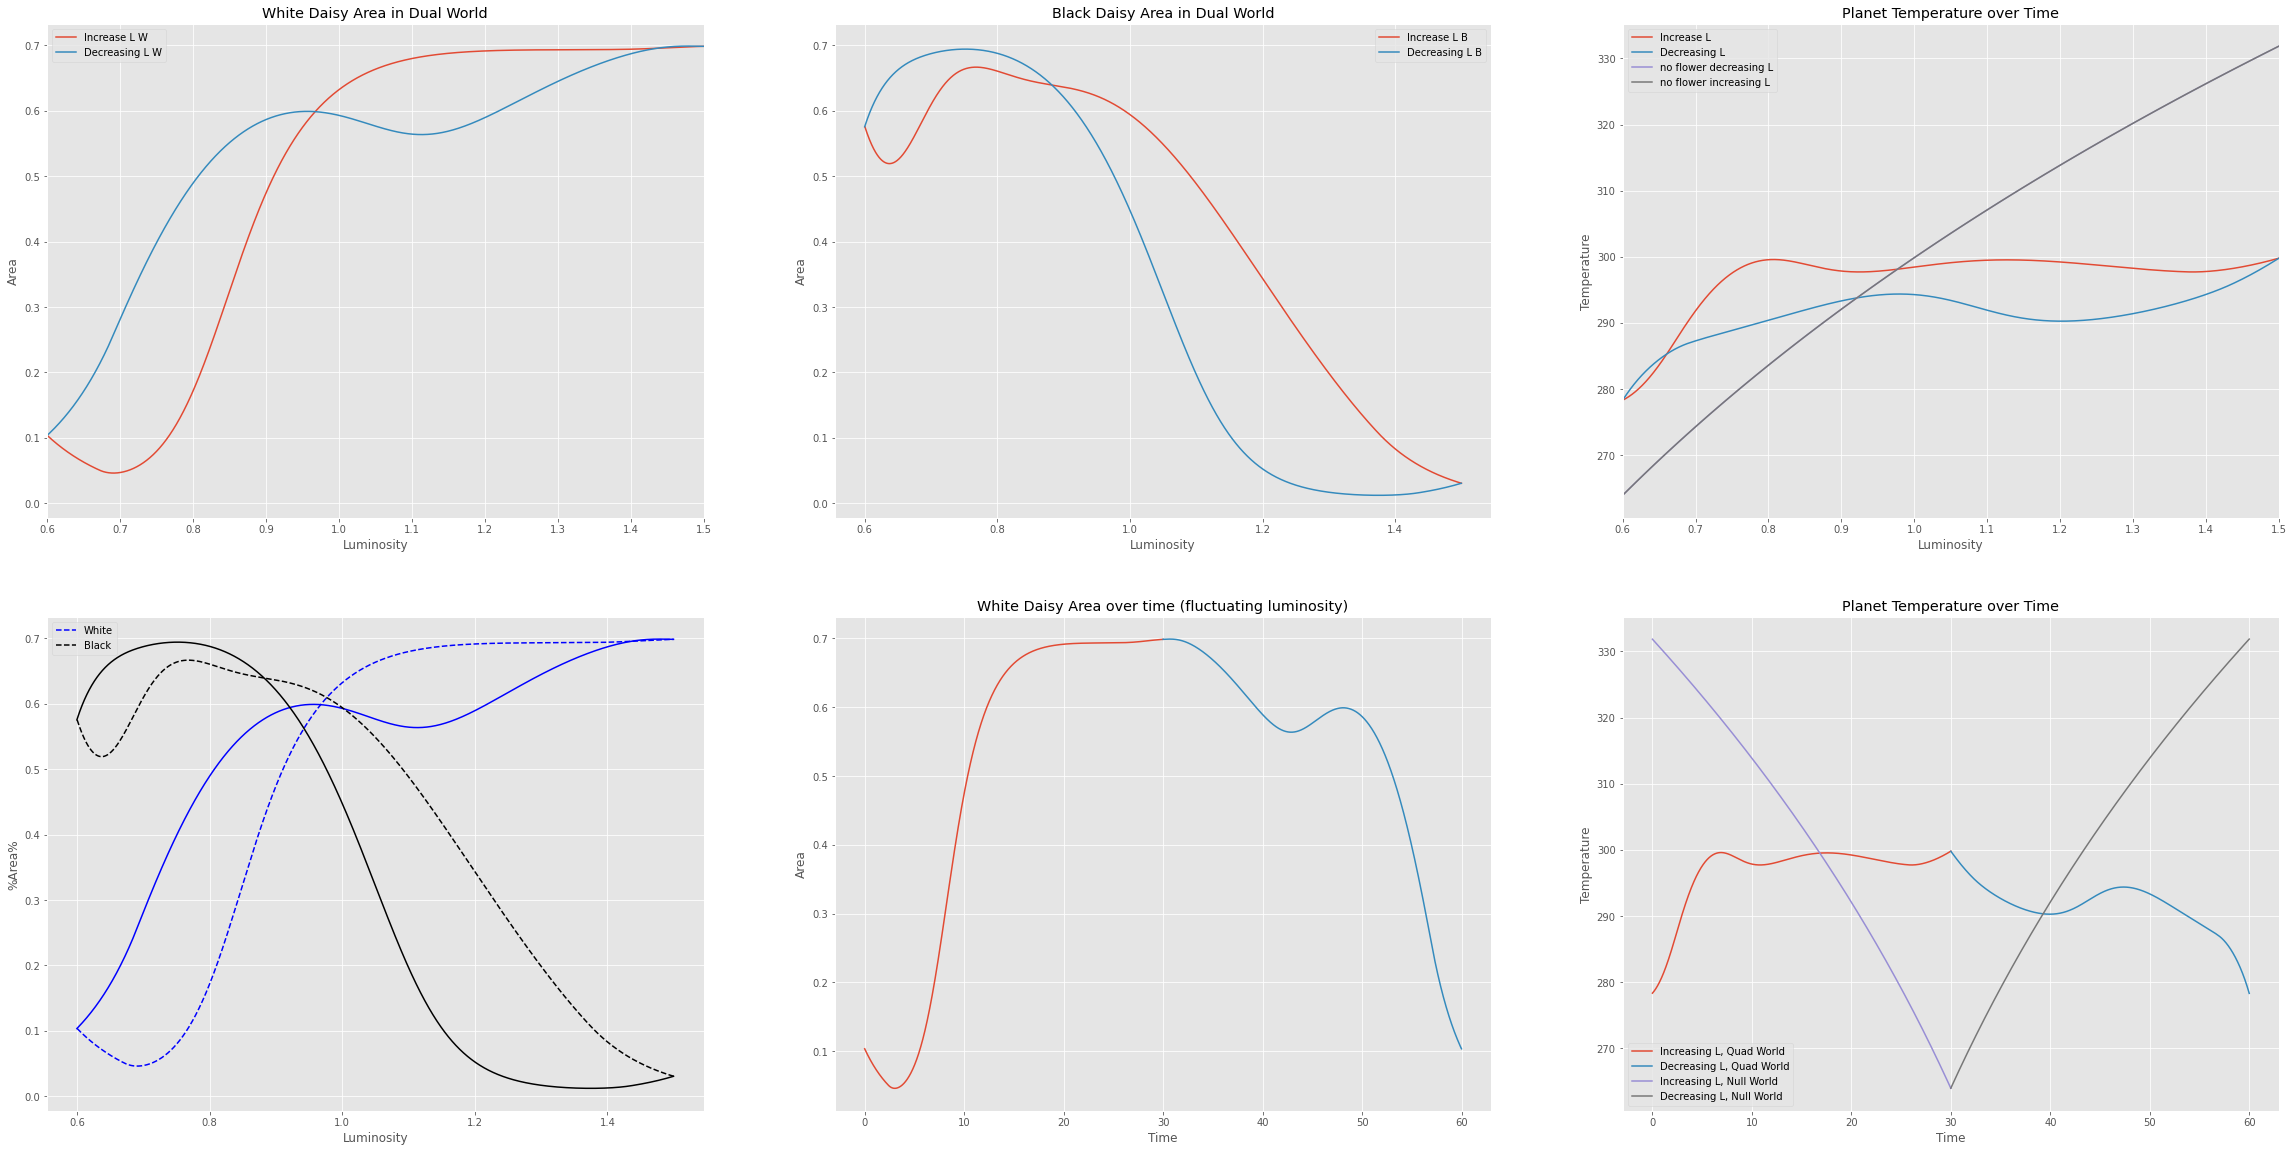

In [ ]:
########################################################################
#Function for changing Luminosity WHILE simulation is running 2 DAISIES#
########################################################################

HL = 1.5
LL = 0.6

time,Aw_list,Ab_list,T_list,L_list = greydaisies(0.5,0.5,30,0.01,HL,L=LL)
timea,Aw_lista,Ab_lista,T_lista,L_lista = greydaisies(Aw_list[-1],Ab_list[-1],30,0.01,LL,L=HL)

time,Aw_list,Ab_list,T_list,L_list = greydaisies(Aw_lista[-1],Ab_lista[-1],30,0.01,HL,L=LL)
timea,Aw_lista,Ab_lista,T_lista,L_lista = greydaisies(Aw_list[-1],Ab_list[-1],30,0.01,LL,L=HL)

#Simulate world with no daisies#
timeb,Aw_listb,Ab_listb,T_listb,L_listb = greydaisies(0,0,30,0.01,LL,L=HL)
timec,Aw_listc,Ab_listc,T_listc,L_listc = greydaisies(0,0,30,0.01,HL,L=LL)

fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(40,20))
ax1, ax4, ax3, ax2, ax5, ax6 = axes.ravel()

ax1.plot(L_list, Aw_list, label = "Increase L W")
ax1.plot(L_lista, Aw_lista, label = "Decreasing L W")
#ax1.plot(L_listb, Aw_listb, label = "no flower decreasing L")
ax1.legend()
#ax1.set_ylim(0.1,LL)
ax1.set_xlim(0.6,HL)
ax1.set_xlabel('Luminosity')
ax1.set_ylabel('Area')
ax1.set_title("White Daisy Area in Dual World")

ax3.plot(L_list, T_list, label = "Increase L")
ax3.plot(L_lista, T_lista, label = "Decreasing L")
ax3.plot(L_listb, T_listb, label = "no flower decreasing L")
ax3.plot(L_listc, T_listc, label = "no flower increasing L")
ax3.legend()
#ax2.set_ylim(10+273,80+273)
ax3.set_xlim(0.6,HL)
ax3.set_xlabel('Luminosity')
ax3.set_ylabel('Temperature')
ax3.set_title(f"Planet Temperature over Time")

ax2.plot(L_list, Aw_list, 'b--',label = "White")
ax2.plot(L_lista, Aw_lista, 'b')
ax2.plot(L_list, Ab_list, "k--", label = "Black")
ax2.plot(L_lista, Ab_lista, "k")
ax2.legend()
ax2.set_xlabel("Luminosity")
ax2.set_ylabel("%Area%")

ax4.plot(L_list, Ab_list, "-", label = "Increase L B")
ax4.plot(L_lista, Ab_lista, "-", label = "Decreasing L B")
ax4.set_xlabel('Luminosity')
ax4.set_ylabel('Area')
ax4.set_title("Black Daisy Area in Dual World")


###############################################################
#Plotting graph of actual fluctuation over time as if in orbit#
###############################################################

time = np.array(time)
timea = np.array(timea)
ax5.plot(time, Aw_list)
ax5.plot(timea+time[-1], Aw_lista)
ax5.set_title(f"White Daisy Area over time (fluctuating luminosity)")
ax5.set_xlabel('Time')
ax5.set_ylabel("Area")

ax6.plot(time, T_list, label = "Increasing L, Quad World")
ax6.plot(timea+time[-1], T_lista, label = "Decreasing L, Quad World")
ax6.plot(time, T_listb, label = "Increasing L, Null World")
ax6.plot(timea+time[-1], T_listc, label = "Decreasing L, Null World")

ax6.set_title(f"Planet Temperature over Time")
ax6.set_xlabel('Time')
ax6.set_ylabel("Temperature")
ax6.legend()

ax1.get_shared_y_axes().join(ax1, ax4)
ax3.get_shared_y_axes().join(ax3, ax6)
ax4.legend()
from google.colab import files
fn = 'Area over L 2 daisy.png'
plt.savefig(fn, bbox_inches = 'tight', dpi = 300)
#files.download(fn)

plt.show()

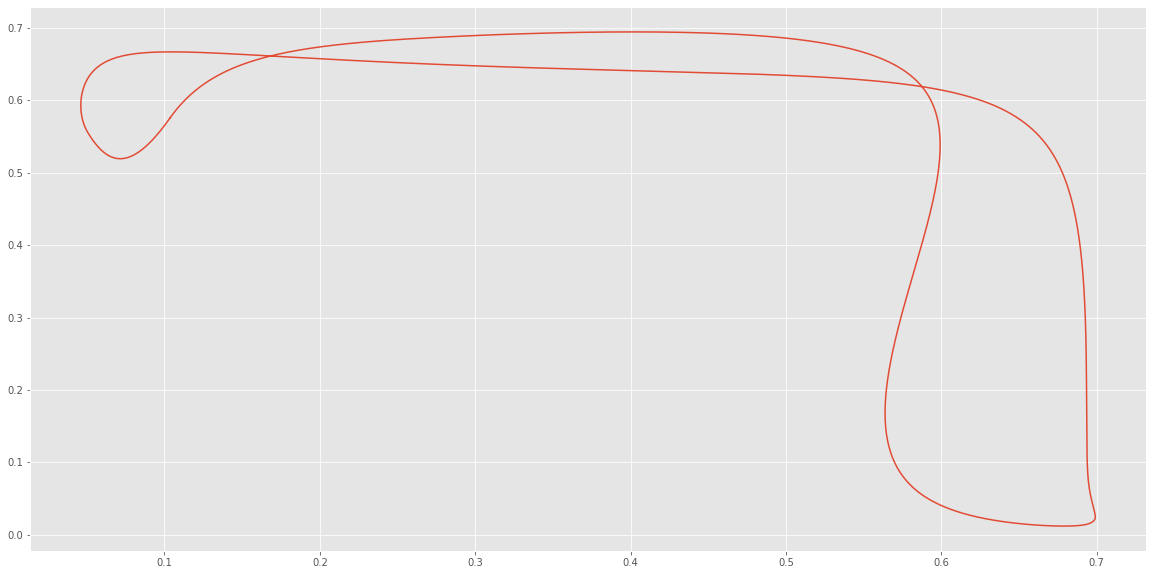

In [ ]:
fig, ax1 = plt.subplots(ncols=1, nrows=1,figsize=(20,10))
daisy_1_area = (Aw_list+Aw_lista)
daisy_2_area = (Ab_list+Ab_lista)
time_array = np.concatenate((time, timea+time[-1]))

#ax1.plot(time_array,daisy_1_area)
#ax1.plot(time_array,daisy_2_area)

ax1.plot(daisy_1_area, daisy_2_area)
#I think this is dual world with area of white vs area of black. The fact that its like
#cyclic shows that its possibly a stable state as luminosity changes?

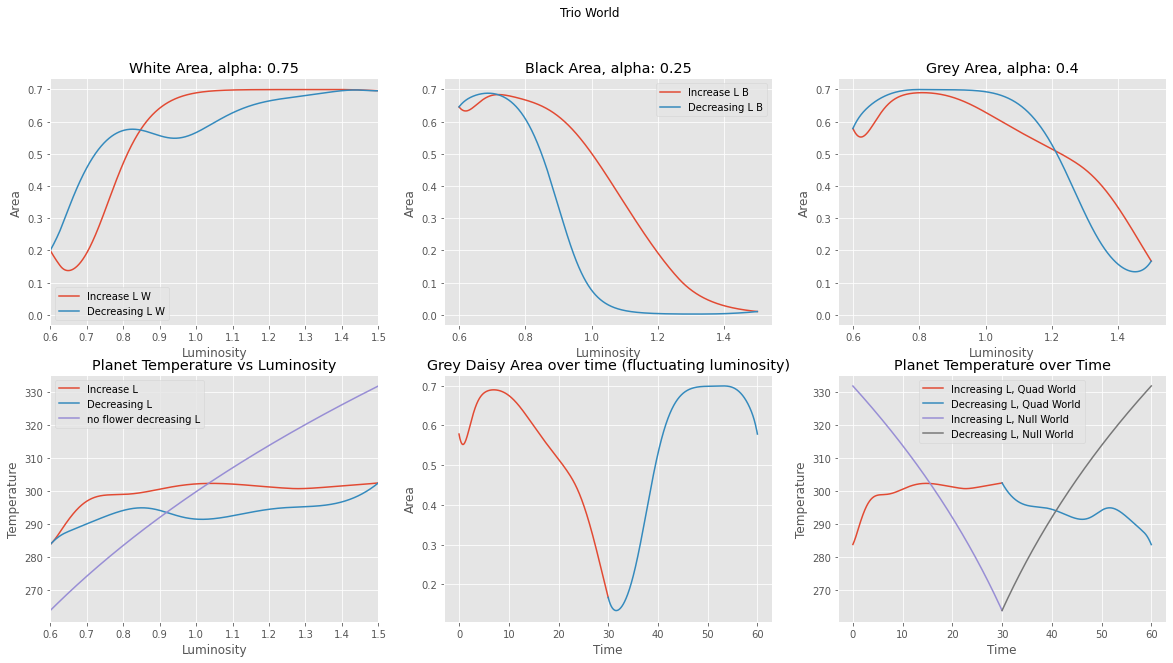

In [ ]:
#################################################################################
#Function for changing Luminosity WHILE simulation is running FOR 3 DAISY PLANET#
#################################################################################
L = 1.500        # Luminosity
ab = 0.25        # Black Daisy Albedo
aw = 0.75        # White Daisy Albedo
at = 0.4         # Grey daisy albedo?
ag = 0.5         # Ground Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.3      # Death Rate


def Three_daisies(Aw,Ab, At,time,dt,L_sup,L=0.8, aw = aw, ab = ab, at = at):
  L_interval=(L_sup-L)/(time/dt)
  L_list=[]
  time=np.arange(0,time,dt)
  Aw_list=[]
  Ab_list=[]
  At_list = []
  T_list=[]

  def dT_e(A,a_e,ai=aw):
    T_d=((R*S*L/sigma)*(a_e-ai)+T_e**4)**0.25
    b=1-0.003265*(Ti+273.15-T_d)**2
    if b < 0:
      b = 0
    return A*((1-A)*b-gamma)

  for i in time:
    L+=L_interval
    L_list.append(L)

    a_e=Aw*aw+(1-Aw-Ab-At)*ag+Ab*ab + At*at
    T_e=(S*L/sigma*(1-a_e))**0.25

    T_list.append(T_e)
    Aw_list.append(Aw)
    Ab_list.append(Ab)
    At_list.append(At)

    dAwdt=dT_e(Aw, a_e, ai = aw)
    dAbdt=dT_e(Ab, a_e, ai = ab)
    dAtdt=dT_e(At, a_e, ai = at)

    Aw+=dAwdt*dt
    Ab+=dAbdt*dt
    At+=dAtdt*dt
    
  return time,Aw_list,Ab_list,At_list,T_list,L_list



HL = 1.5
LL = 0.6

time,Aw_list,Ab_list,At_list,T_list,L_list = Three_daisies(0.3,0.3,0.3,30,0.01,HL,L=LL)
timea,Aw_lista,Ab_lista,At_lista,T_lista,L_lista = Three_daisies(Aw_list[-1],Ab_list[-1],At_list[-1],30,0.01,LL,L=HL)

time,Aw_list,Ab_list,At_list,T_list,L_list = Three_daisies(Aw_lista[-1],Ab_lista[-1],At_lista[-1],30,0.01,HL,L=LL)
timea,Aw_lista,Ab_lista,At_lista,T_lista,L_lista = Three_daisies(Aw_list[-1],Ab_list[-1],At_list[-1],30,0.01,LL,L=HL)

#Simulate world with no daisies#
timeb,Aw_listb,Ab_listb,T_listb,L_listb = greydaisies(0,0,30,0.01,LL,L=HL)
timec,Aw_listc,Ab_listc,T_listc,L_listc = greydaisies(0,0,30,0.01,HL,L=LL)

fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(20,10))
ax1, ax4, ax2, ax3, ax5, ax6 = axes.ravel()

fig.suptitle('Trio World')
ax1.plot(L_list, Aw_list, label = "Increase L W")
ax1.plot(L_lista, Aw_lista, label = "Decreasing L W")
#ax1.plot(L_listb, Aw_listb, label = "no flower decreasing L")
ax1.legend()
#ax1.set_ylim(0.1,LL)
ax1.set_xlim(0.6,HL)
ax1.set_xlabel('Luminosity')
ax1.set_ylabel('Area')
ax1.set_title(f"White Area, alpha: {aw}")

ax3.plot(L_list, T_list, label = "Increase L")
ax3.plot(L_lista, T_lista, label = "Decreasing L")
ax3.plot(L_listb, T_listb, label = "no flower decreasing L")
ax3.legend()
#ax2.set_ylim(10+273,80+273)
ax3.set_xlim(0.6,HL)
ax3.set_xlabel('Luminosity')
ax3.set_ylabel('Temperature')
ax3.set_title('Planet Temperature vs Luminosity')

ax2.plot(L_list, At_list, label = "Increase L t")
ax2.plot(L_lista, At_lista, label = "Decreasing L t")
ax2.set_xlabel('Luminosity')
ax2.set_ylabel('Area')
ax2.set_title(f"Grey Area, alpha: {at}")

ax4.plot(L_list, Ab_list, "-", label = "Increase L B")
ax4.plot(L_lista, Ab_lista, "-", label = "Decreasing L B")
ax4.set_xlabel('Luminosity')
ax4.set_ylabel('Area')
ax4.set_title(f"Black Area, alpha: {ab}")

###############################################################
#Plotting graph of actual fluctuation over time as if in orbit#
###############################################################

time = np.array(time)
timea = np.array(timea)
ax5.plot(time, At_list)
ax5.plot(timea+time[-1], At_lista)
ax5.set_title(f"Grey Daisy Area over time (fluctuating luminosity)")
ax5.set_xlabel('Time')
ax5.set_ylabel("Area")

ax6.plot(time, T_list, label = "Increasing L, Quad World")
ax6.plot(timea+time[-1], T_lista, label = "Decreasing L, Quad World")
ax6.plot(time, T_listb, label = "Increasing L, Null World")
ax6.plot(timea+time[-1], T_listc, label = "Decreasing L, Null World")

ax6.set_title(f"Planet Temperature over Time")
ax6.set_xlabel('Time')
ax6.set_ylabel("Temperature")
ax6.legend()

ax1.get_shared_y_axes().join(ax1, ax4)
ax1.get_shared_y_axes().join(ax1, ax2)
ax6.get_shared_y_axes().join(ax6, ax3)
ax4.legend()
plt.show()

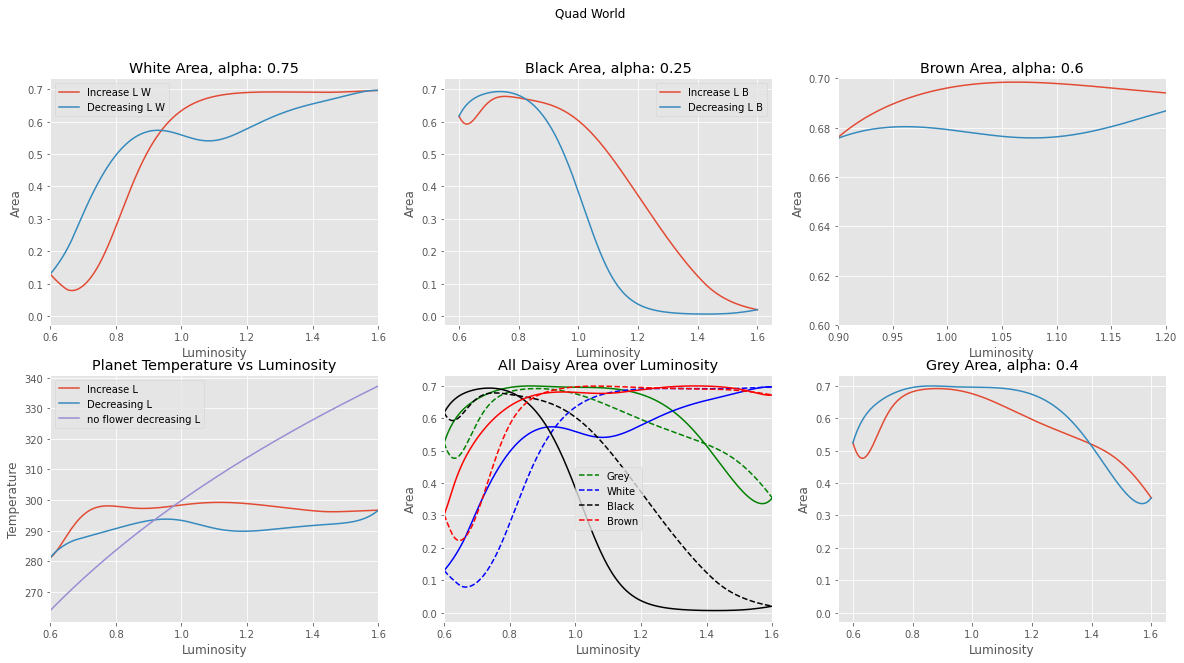

In [ ]:
#################################################################################
#Function for changing Luminosity WHILE simulation is running FOR 4 DAISY PLANET#
#################################################################################
L = 1.500        # Luminosity
ab = 0.25        # Black Daisy Albedo
aw = 0.75        # White Daisy Albedo
at = 0.4         # Grey daisy albedo?
ag = 0.5         # Ground Albedo
abro = 0.6      # Brown Daisy Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.3      # Death Rate


def four_daisies(Aw,Ab,At,Abro,time,dt,L_sup,L=0.8, aw = aw, ab = ab, at = at, abro = abro):
  L_interval=(L_sup-L)/(time/dt)
  L_list=[]
  time=np.arange(0,time,dt)
  Aw_list=[]
  Ab_list=[]
  At_list = []
  Abro_list = []
  T_list=[]

  def dT_e(A,a_e,ai=aw):
    T_d=((R*S*L/sigma)*(a_e-ai)+T_e**4)**0.25
    b=1-0.003265*(Ti+273.15-T_d)**2
    if b < 0:
      b = 0
    return A*((1-A)*b-gamma)

  for i in time:
    L+=L_interval
    L_list.append(L)

    a_e=Aw*aw+(1-Aw-Ab-At-Abro)*ag+Ab*ab + At*at + Abro*abro
    T_e=(S*L/sigma*(1-a_e))**0.25

    T_list.append(T_e)
    Aw_list.append(Aw)
    Ab_list.append(Ab)
    At_list.append(At)
    Abro_list.append(Abro)

    dAwdt=dT_e(Aw, a_e, ai = aw)
    dAbdt=dT_e(Ab, a_e, ai = ab)
    dAtdt=dT_e(At, a_e, ai = at)
    dAbrodt=dT_e(Abro, a_e, ai = abro)

    Aw+=dAwdt*dt
    Ab+=dAbdt*dt
    At+=dAtdt*dt
    Abro+=dAbrodt*dt
    
  return time,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list



HL = 1.6
LL = 0.6

time,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = four_daisies(0.25,0.25,0.25,0.25,30,0.01,HL,L=LL)
timea,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = four_daisies(Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)

time,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = four_daisies(Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
timea,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = four_daisies(Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)


#Simulate world with no daisies#
timeb,Aw_listb,Ab_listb,T_listb,L_listb = greydaisies(0,0,30,0.01,LL,L=HL)
timec,Aw_listc,Ab_listc,T_listc,L_listc = greydaisies(0,0,30,0.01,HL,L=LL)


fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(20,10))
ax1, ax4, ax2, ax3, ax5, ax6 = axes.ravel()

fig.suptitle('Quad World')
ax1.plot(L_list, Aw_list, label = "Increase L W")
ax1.plot(L_lista, Aw_lista, label = "Decreasing L W")
#ax1.plot(L_listb, Aw_listb, label = "no flower decreasing L")
ax1.legend()
#ax1.set_ylim(0.1,LL)
ax1.set_xlim(0.6,HL)
ax1.set_xlabel('Luminosity')
ax1.set_ylabel('Area')
ax1.set_title(f"White Area, alpha: {aw}")

ax3.plot(L_list, T_list, label = "Increase L")
ax3.plot(L_lista, T_lista, label = "Decreasing L")
ax3.plot(L_listb, T_listb, label = "no flower decreasing L")
ax3.legend()
#ax2.set_ylim(10+273,80+273)
ax3.set_xlim(0.6,HL)
ax3.set_xlabel('Luminosity')
ax3.set_ylabel('Temperature')
ax3.set_title('Planet Temperature vs Luminosity')

#At
'''ax2.plot(L_list, At_list, label = "Increase L t")
ax2.plot(L_lista, At_lista, label = "Decreasing L t")
ax2.set_xlabel('Luminosity')
ax2.set_ylabel('Area')
ax2.set_title(f"Grey Area, alpha: {at}")'''

#Abrown
ax2.plot(L_list, Abro_list, label = "Increase L t")
ax2.plot(L_lista, Abro_lista, label = "Decreasing L t")
ax2.set_xlabel('Luminosity')
ax2.set_ylabel('Area')
ax2.set_title(f"Brown Area, alpha: {abro}")
ax2.set_ylim(0.6,0.7)
ax2.set_xlim(0.9,1.2)

ax4.plot(L_list, Ab_list, "-", label = "Increase L B")
ax4.plot(L_lista, Ab_lista, "-", label = "Decreasing L B")
ax4.set_xlabel('Luminosity')
ax4.set_ylabel('Area')
ax4.set_title(f"Black Area, alpha: {ab}")

###############################################################
#Plotting graph of actual fluctuation over time as if in orbit#
###############################################################

time = np.array(time)
timea = np.array(timea)

ax5.plot(L_list, At_list, 'g--', label = 'Grey')
ax5.plot(L_lista, At_lista, 'g') #grey
ax5.plot(L_list, Aw_list, 'b--', label = 'White')
ax5.plot(L_lista, Aw_lista, 'b') #white
ax5.plot(L_list, Ab_list, 'k--', label = 'Black')
ax5.plot(L_lista, Ab_lista, 'k') #black
ax5.plot(L_list, Abro_list, 'r--', label = 'Brown')
ax5.plot(L_lista, Abro_lista, 'r') #brown
ax5.set_xlim(0.6,1.6)
ax5.legend()


ax5.set_title(f"All Daisy Area over Luminosity")
ax5.set_xlabel('Luminosity')
ax5.set_ylabel("Area")
'''
ax6.plot(time, T_list, label = "Increasing L, Quad World")
ax6.plot(timea+time[-1], T_lista, label = "Decreasing L, Quad World")
ax6.plot(time, T_listb, label = "Increasing L, Null World")
ax6.plot(timea+time[-1], T_listc, label = "Decreasing L, Null World")

ax6.set_title(f"Planet Temperature over Time")
ax6.set_xlabel('Time')
ax6.set_ylabel("Temperature")
ax6.legend()
'''

ax6.plot(L_list, At_list, label = "Increase L t")
ax6.plot(L_lista, At_lista, label = "Decreasing L t")
ax6.set_xlabel('Luminosity')
ax6.set_ylabel('Area')
ax6.set_title(f"Grey Area, alpha: {at}")




ax1.get_shared_y_axes().join(ax1, ax4)
#ax1.get_shared_y_axes().join(ax1, ax2)
ax6.get_shared_y_axes().join(ax6, ax1)
ax4.legend()


from google.colab import files
fn = 'Quadworld expand HY.png'
#plt.savefig(fn, bbox_inches = 'tight', dpi = 300)
#files.download(fn)

plt.show()

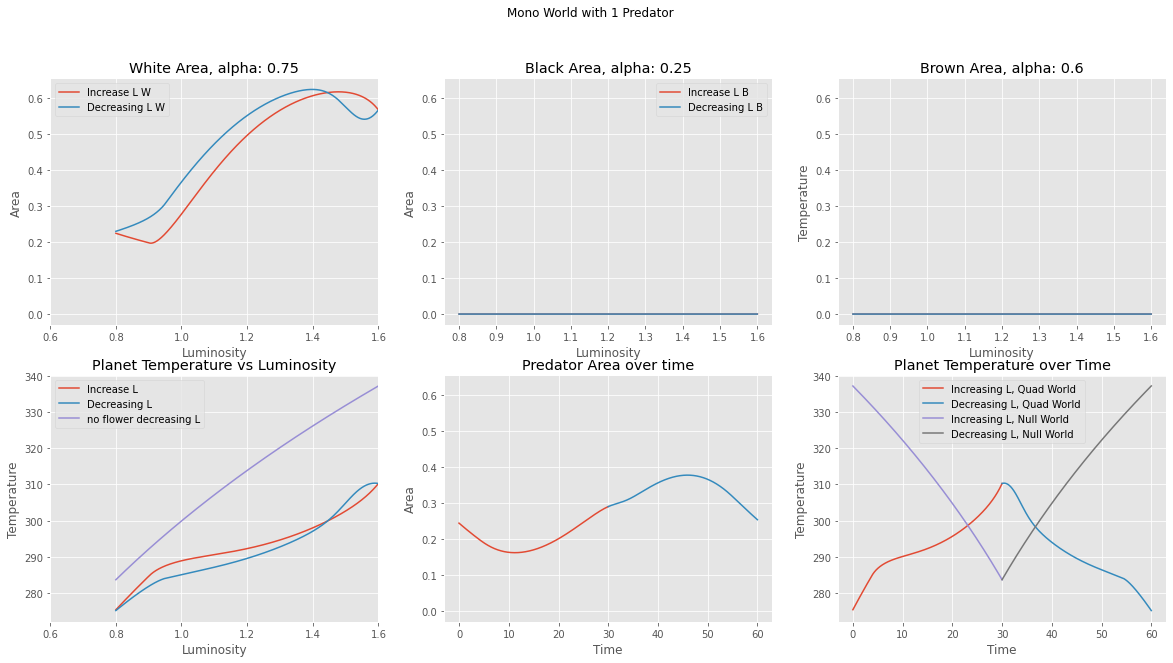

In [ ]:
#######################################################################################################
#Function for changing Luminosity WHILE simulation is running FOR 1 DAISY PLANET AND ADDING A PREDATOR#
#######################################################################################################
L = 1.500        # Luminosity
ab = 0.25        # Black Daisy Albedo
aw = 0.75        # White Daisy Albedo
at = 0.4         # Grey daisy albedo?
ag = 0.5         # Ground Albedo
abro = 0.6      # Brown Daisy Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.3      # Death Rate

######################
# Predator Constants #
######################
birth_rate = 0.3
death_rate = 0.1




def fourp_daisies(Apred, Aw,Ab,At,Abro,time,dt,L_sup,L=0.8, aw = aw, ab = ab, at = at, abro = abro):
  L_interval=(L_sup-L)/(time/dt)
  L_list=[]
  time=np.arange(0,time,dt)
  Aw_list=[]
  Ab_list=[]
  At_list = []
  Abro_list = []
  T_list=[] 
  predator_list = []

  def dT_e(A,a_e,ai=aw):
    T_d=((R*S*L/sigma)*(a_e-ai)+T_e**4)**0.25
    b=1-0.003265*(Ti+273.15-T_d)**2
    if b < 0:
      b = 0
    return A*((1-A)*b-gamma)
  
  def dPdT(A, Aw):
    return A*((1-A)*birth_rate*Aw - death_rate)

  for i in time:
    L+=L_interval
    L_list.append(L)

    a_e=Aw*aw+(1-Aw-Ab-At-Abro)*ag+Ab*ab + At*at + Abro*abro
    T_e=(S*L/sigma*(1-a_e))**0.25

    T_list.append(T_e)
    Aw_list.append(Aw)
    Ab_list.append(Ab)
    At_list.append(At)
    Abro_list.append(Abro)
    predator_list.append(Apred)

    dAwdt=dT_e(Aw, a_e, ai = aw)
    dAbdt=dT_e(Ab, a_e, ai = ab)
    dAtdt=dT_e(At, a_e, ai = at)
    dAbrodt=dT_e(Abro, a_e, ai = abro)
    dApreddt = dPdT(Apred, Aw)

    Aw+=dAwdt*dt - dApreddt*dt*5
    Ab+=dAbdt*dt
    At+=dAtdt*dt
    Abro+=dAbrodt*dt 
    Apred+= dApreddt*dt
    
  return time,predator_list, Aw_list,Ab_list,At_list,Abro_list,T_list,L_list



HL = 1.6
LL = 0.8

time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(0.2,0.3,0,0,0,30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)

time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(Apred_lista[-1],Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)


#Simulate world with no daisies#
timeb,Aw_listb,Ab_listb,T_listb,L_listb = greydaisies(0,0,30,0.01,LL,L=HL)
timec,Aw_listc,Ab_listc,T_listc,L_listc = greydaisies(0,0,30,0.01,HL,L=LL)


fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(20,10))
ax1, ax4, ax2, ax3, ax5, ax6 = axes.ravel()

fig.suptitle('Mono World with 1 Predator')
ax1.plot(L_list, Aw_list, label = "Increase L W")
ax1.plot(L_lista, Aw_lista, label = "Decreasing L W")
#ax1.plot(L_listb, Aw_listb, label = "no flower decreasing L")
ax1.legend()
#ax1.set_ylim(0.1,LL)
ax1.set_xlim(0.6,HL)
ax1.set_xlabel('Luminosity')
ax1.set_ylabel('Area')
ax1.set_title(f"White Area, alpha: {aw}")

ax3.plot(L_list, T_list, label = "Increase L")
ax3.plot(L_lista, T_lista, label = "Decreasing L")
ax3.plot(L_listb, T_listb, label = "no flower decreasing L")
ax3.legend()
#ax2.set_ylim(10+273,80+273)
ax3.set_xlim(0.6,HL)
ax3.set_xlabel('Luminosity')
ax3.set_ylabel('Temperature')
ax3.set_title('Planet Temperature vs Luminosity')

#At
'''ax2.plot(L_list, At_list, label = "Increase L t")
ax2.plot(L_lista, At_lista, label = "Decreasing L t")
ax2.set_xlabel('Luminosity')
ax2.set_ylabel('Temperature')
ax2.set_title(f"Grey Area, alpha: {at}")'''

#Abrown
ax2.plot(L_list, Abro_list, label = "Increase L t")
ax2.plot(L_lista, Abro_lista, label = "Decreasing L t")
ax2.set_xlabel('Luminosity')
ax2.set_ylabel('Temperature')
ax2.set_title(f"Brown Area, alpha: {abro}")


ax4.plot(L_list, Ab_list, "-", label = "Increase L B")
ax4.plot(L_lista, Ab_lista, "-", label = "Decreasing L B")
ax4.set_xlabel('Luminosity')
ax4.set_ylabel('Area')
ax4.set_title(f"Black Area, alpha: {ab}")

###############################################################
#Plotting graph of actual fluctuation over time as if in orbit#
###############################################################

time = np.array(time)
timea = np.array(timea)
ax5.plot(time, Apred_list)
ax5.plot(timea+time[-1], Apred_lista)
ax5.set_title(f"Predator Area over time")
ax5.set_xlabel('Time')
ax5.set_ylabel("Area")

ax6.plot(time, T_list, label = "Increasing L, Quad World")
ax6.plot(timea+time[-1], T_lista, label = "Decreasing L, Quad World")
ax6.plot(time, T_listb, label = "Increasing L, Null World")
ax6.plot(timea+time[-1], T_listc, label = "Decreasing L, Null World")

ax6.set_title(f"Planet Temperature over Time")
ax6.set_xlabel('Time')
ax6.set_ylabel("Temperature")
ax6.legend()

ax1.get_shared_y_axes().join(ax1, ax4)
ax1.get_shared_y_axes().join(ax1, ax2)
ax6.get_shared_y_axes().join(ax6, ax3)
ax6.get_shared_y_axes().join(ax1, ax5)
ax4.legend()
plt.show()

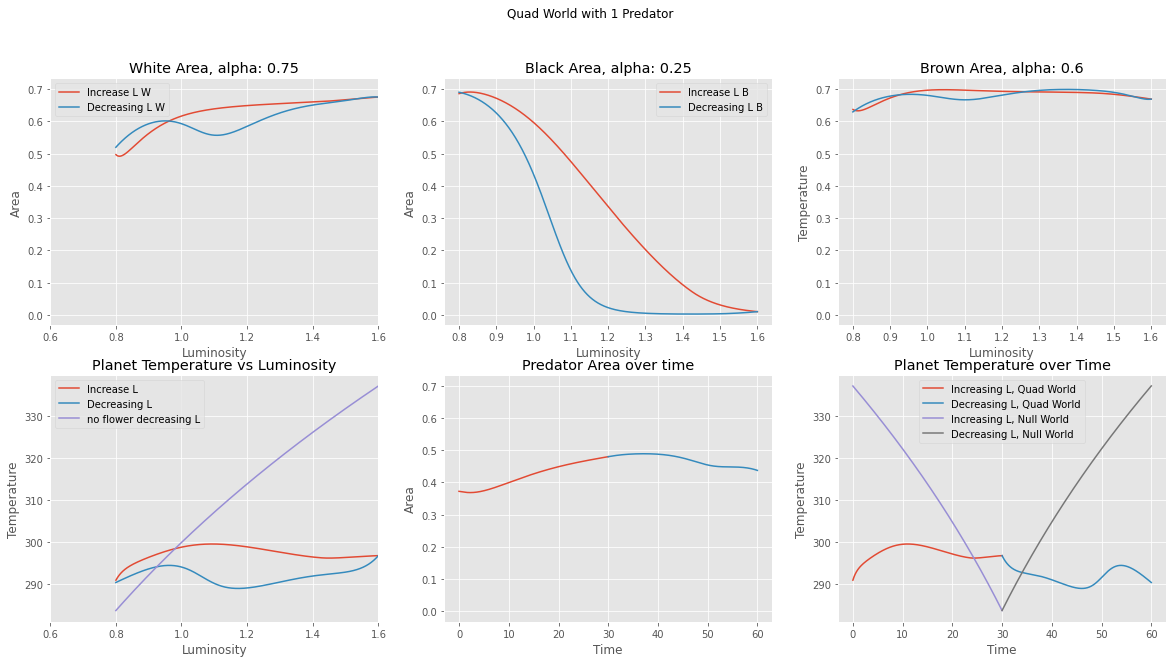

In [ ]:
#######################################################################################################
#Function for changing Luminosity WHILE simulation is running FOR 4 DAISY PLANET AND ADDING A PREDATOR#
#######################################################################################################

HL = 1.6
LL = 0.8

time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(0.1,0.1,0.1,0.1,0.1,30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)

time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(Apred_lista[-1],Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)


#Simulate world with no daisies#
timeb,Aw_listb,Ab_listb,T_listb,L_listb = greydaisies(0,0,30,0.01,LL,L=HL)
timec,Aw_listc,Ab_listc,T_listc,L_listc = greydaisies(0,0,30,0.01,HL,L=LL)


fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(20,10))
ax1, ax4, ax2, ax3, ax5, ax6 = axes.ravel()

fig.suptitle('Quad World with 1 Predator')
ax1.plot(L_list, Aw_list, label = "Increase L W")
ax1.plot(L_lista, Aw_lista, label = "Decreasing L W")
#ax1.plot(L_listb, Aw_listb, label = "no flower decreasing L")
ax1.legend()
#ax1.set_ylim(0.1,LL)
ax1.set_xlim(0.6,HL)
ax1.set_xlabel('Luminosity')
ax1.set_ylabel('Area')
ax1.set_title(f"White Area, alpha: {aw}")

ax3.plot(L_list, T_list, label = "Increase L")
ax3.plot(L_lista, T_lista, label = "Decreasing L")
ax3.plot(L_listb, T_listb, label = "no flower decreasing L")
ax3.legend()
#ax2.set_ylim(10+273,80+273)
ax3.set_xlim(0.6,HL)
ax3.set_xlabel('Luminosity')
ax3.set_ylabel('Temperature')
ax3.set_title('Planet Temperature vs Luminosity')

#At
'''ax2.plot(L_list, At_list, label = "Increase L t")
ax2.plot(L_lista, At_lista, label = "Decreasing L t")
ax2.set_xlabel('Luminosity')
ax2.set_ylabel('Temperature')
ax2.set_title(f"Grey Area, alpha: {at}")'''

#Abrown
ax2.plot(L_list, Abro_list, label = "Increase L t")
ax2.plot(L_lista, Abro_lista, label = "Decreasing L t")
ax2.set_xlabel('Luminosity')
ax2.set_ylabel('Temperature')
ax2.set_title(f"Brown Area, alpha: {abro}")


ax4.plot(L_list, Ab_list, "-", label = "Increase L B")
ax4.plot(L_lista, Ab_lista, "-", label = "Decreasing L B")
ax4.set_xlabel('Luminosity')
ax4.set_ylabel('Area')
ax4.set_title(f"Black Area, alpha: {ab}")

###############################################################
#Plotting graph of actual fluctuation over time as if in orbit#
###############################################################

time = np.array(time)
timea = np.array(timea)
ax5.plot(time, Apred_list)
ax5.plot(timea+time[-1], Apred_lista)
ax5.set_title(f"Predator Area over time")
ax5.set_xlabel('Time')
ax5.set_ylabel("Area")

ax6.plot(time, T_list, label = "Increasing L, Quad World")
ax6.plot(timea+time[-1], T_lista, label = "Decreasing L, Quad World")
ax6.plot(time, T_listb, label = "Increasing L, Null World")
ax6.plot(timea+time[-1], T_listc, label = "Decreasing L, Null World")

ax6.set_title(f"Planet Temperature over Time")
ax6.set_xlabel('Time')
ax6.set_ylabel("Temperature")
ax6.legend()

ax1.get_shared_y_axes().join(ax1, ax4)
ax1.get_shared_y_axes().join(ax1, ax2)
ax6.get_shared_y_axes().join(ax6, ax3)
ax6.get_shared_y_axes().join(ax1, ax5)
ax4.legend()
plt.show()

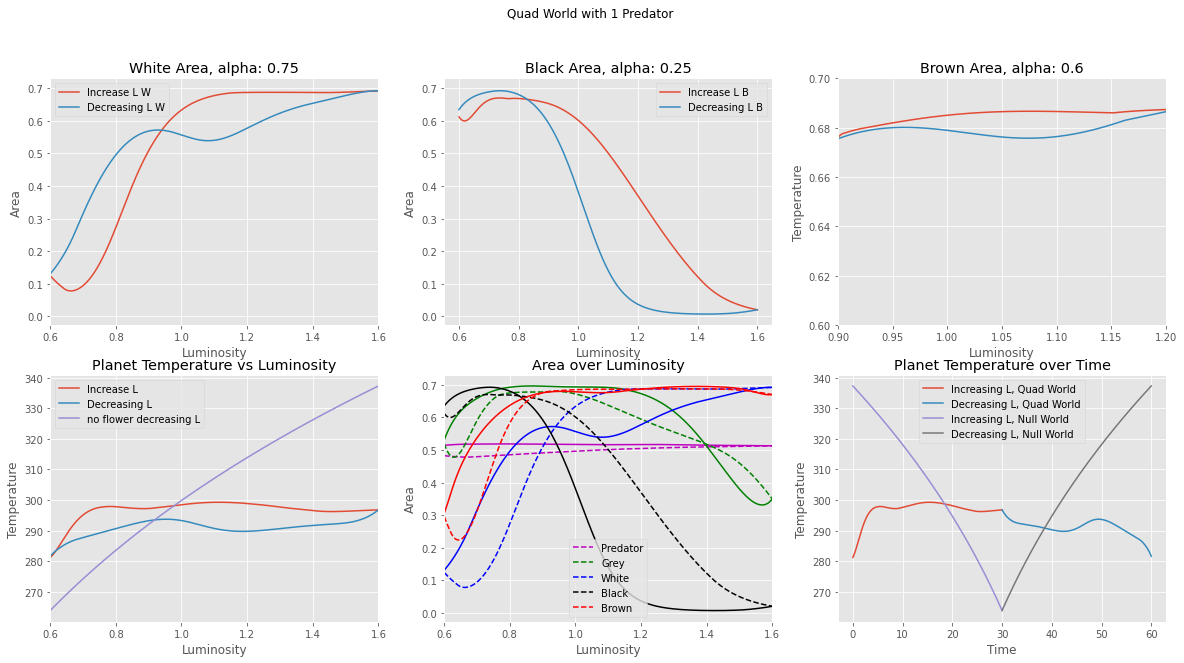

In [ ]:
###########################################################################################################################
#Function for changing Luminosity WHILE simulation is running FOR 4 DAISY PLANET AND ADDING A PREDATOR WITH PREY SWITCHING#
###########################################################################################################################
L = 1.500        # Luminosity
ab = 0.25        # Black Daisy Albedo
aw = 0.75        # White Daisy Albedo
at = 0.4         # Grey daisy albedo?
ag = 0.5         # Ground Albedo
abro = 0.6      # Brown Daisy Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.3      # Death Rate

######################
# Predator Constants #
######################
birth_rate = 0.3
death_rate = 0.1




def fourp_daisies(Apred, Aw,Ab,At,Abro,time,dt,L_sup,L=0.8, aw = aw, ab = ab, at = at, abro = abro):
  L_interval=(L_sup-L)/(time/dt)
  L_list=[]
  time=np.arange(0,time,dt)
  Aw_list=[]
  Ab_list=[]
  At_list = []
  Abro_list = []
  T_list=[] 
  predator_list = []

  def dT_e(A,a_e,ai=aw):
    T_d=((R*S*L/sigma)*(a_e-ai)+T_e**4)**0.25
    b=1-0.003265*(Ti+273.15-T_d)**2
    if b < 0:
      b = 0
    return A*((1-A)*b-gamma)
  
  def dPdT(A, Aw):
    return A*((1-A)*birth_rate*Aw - death_rate)

  for i in time:
    L+=L_interval
    L_list.append(L)

    a_e=Aw*aw+(1-Aw-Ab-At-Abro)*ag+Ab*ab + At*at + Abro*abro
    T_e=(S*L/sigma*(1-a_e))**0.25

    T_list.append(T_e)
    Aw_list.append(Aw)
    Ab_list.append(Ab)
    At_list.append(At)
    Abro_list.append(Abro)
    predator_list.append(Apred)

    #Prey switching logic#
    daisy_dict = {}
    daisy_dict['white'] = Aw
    daisy_dict['black'] = Ab
    daisy_dict['grey'] = At
    daisy_dict['brown'] = Abro
    max_key = max(daisy_dict, key=daisy_dict.get)
    maxAd = max(daisy_dict.values())

    dAwdt=dT_e(Aw, a_e, ai = aw)
    dAbdt=dT_e(Ab, a_e, ai = ab)
    dAtdt=dT_e(At, a_e, ai = at)
    dAbrodt=dT_e(Abro, a_e, ai = abro)
    dApreddt = dPdT(Apred, maxAd)
    prey_change = dApreddt*dt*5

    if max_key == 'white':
      Aw+=dAwdt*dt - prey_change
      Ab+=dAbdt*dt
      At+=dAtdt*dt
      Abro+=dAbrodt*dt 
      Apred+= dApreddt*dt
    
    elif max_key == 'black':
      Aw+=dAwdt*dt
      Ab+=dAbdt*dt - prey_change
      At+=dAtdt*dt
      Abro+=dAbrodt*dt 
      Apred+= dApreddt*dt
    
    elif max_key == 'grey':
      Aw+=dAwdt*dt
      Ab+=dAbdt*dt
      At+=dAtdt*dt - prey_change
      Abro+=dAbrodt*dt 
      Apred+= dApreddt*dt
    
    else:
      Aw+=dAwdt*dt
      Ab+=dAbdt*dt
      At+=dAtdt*dt
      Abro+=dAbrodt*dt - prey_change
      Apred+= dApreddt*dt
    
  return time,predator_list, Aw_list,Ab_list,At_list,Abro_list,T_list,L_list



HL = 1.6
LL = 0.6

time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(0.2,0.3,0.2,0.2,0.1,30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)

time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(Apred_lista[-1],Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)


#Simulate world with no daisies#
timeb,Aw_listb,Ab_listb,T_listb,L_listb = greydaisies(0,0,30,0.01,LL,L=HL)
timec,Aw_listc,Ab_listc,T_listc,L_listc = greydaisies(0,0,30,0.01,HL,L=LL)


fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(20,10))
ax1, ax4, ax2, ax3, ax5, ax6 = axes.ravel()

fig.suptitle('Quad World with 1 Predator')
ax1.plot(L_list, Aw_list, label = "Increase L W")
ax1.plot(L_lista, Aw_lista, label = "Decreasing L W")
#ax1.plot(L_listb, Aw_listb, label = "no flower decreasing L")
ax1.legend()
#ax1.set_ylim(0.1,LL)
ax1.set_xlim(0.6,HL)
ax1.set_xlabel('Luminosity')
ax1.set_ylabel('Area')
ax1.set_title(f"White Area, alpha: {aw}")

ax3.plot(L_list, T_list, label = "Increase L")
ax3.plot(L_lista, T_lista, label = "Decreasing L")
ax3.plot(L_listb, T_listb, label = "no flower decreasing L")
ax3.legend()
#ax2.set_ylim(10+273,80+273)
ax3.set_xlim(0.6,HL)
ax3.set_xlabel('Luminosity')
ax3.set_ylabel('Temperature')
ax3.set_title('Planet Temperature vs Luminosity')

#At
'''ax2.plot(L_list, At_list, label = "Increase L t")
ax2.plot(L_lista, At_lista, label = "Decreasing L t")
ax2.set_xlabel('Luminosity')
ax2.set_ylabel('Temperature')
ax2.set_title(f"Grey Area, alpha: {at}")'''

#Abrown
ax2.plot(L_list, Abro_list, label = "Increase L t")
ax2.plot(L_lista, Abro_lista, label = "Decreasing L t")
ax2.set_xlabel('Luminosity')
ax2.set_ylabel('Temperature')
ax2.set_title(f"Brown Area, alpha: {abro}")
ax2.set_ylim(0.6,0.7)
ax2.set_xlim(0.9,1.2)


ax4.plot(L_list, Ab_list, "-", label = "Increase L B")
ax4.plot(L_lista, Ab_lista, "-", label = "Decreasing L B")
ax4.set_xlabel('Luminosity')
ax4.set_ylabel('Area')
ax4.set_title(f"Black Area, alpha: {ab}")

###############################################################
#Plotting graph of actual fluctuation over time as if in orbit#
###############################################################

time = np.array(time)
timea = np.array(timea)

ax5.plot(L_list, Apred_list,'m--', label = 'Predator')
ax5.plot(L_lista, Apred_lista,'m')
ax5.plot(L_list, At_list, 'g--', label = 'Grey')
ax5.plot(L_lista, At_lista, 'g') #grey
ax5.plot(L_list, Aw_list, 'b--', label = 'White')
ax5.plot(L_lista, Aw_lista, 'b') #white
ax5.plot(L_list, Ab_list, 'k--', label = 'Black')
ax5.plot(L_lista, Ab_lista, 'k') #black
ax5.plot(L_list, Abro_list, 'r--', label = 'Brown')
ax5.plot(L_lista, Abro_lista, 'r') #brown
ax5.legend()
ax5.set_xlim(0.6,1.6)


ax5.set_title(f"Area over Luminosity")
ax5.set_xlabel('Luminosity')
ax5.set_ylabel("Area")

ax6.plot(time, T_list, label = "Increasing L, Quad World")
ax6.plot(timea+time[-1], T_lista, label = "Decreasing L, Quad World")
ax6.plot(time, T_listb, label = "Increasing L, Null World")
ax6.plot(timea+time[-1], T_listc, label = "Decreasing L, Null World")

ax6.set_title(f"Planet Temperature over Time")
ax6.set_xlabel('Time')
ax6.set_ylabel("Temperature")
ax6.legend()

ax1.get_shared_y_axes().join(ax1, ax4)
#ax1.get_shared_y_axes().join(ax1, ax2)
ax6.get_shared_y_axes().join(ax6, ax3)
ax6.get_shared_y_axes().join(ax1, ax5)
ax4.legend()
from google.colab import files
fn = 'Quad World with Pred.png'
#plt.savefig(fn, bbox_inches = 'tight', dpi = 300)
#files.download(fn)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

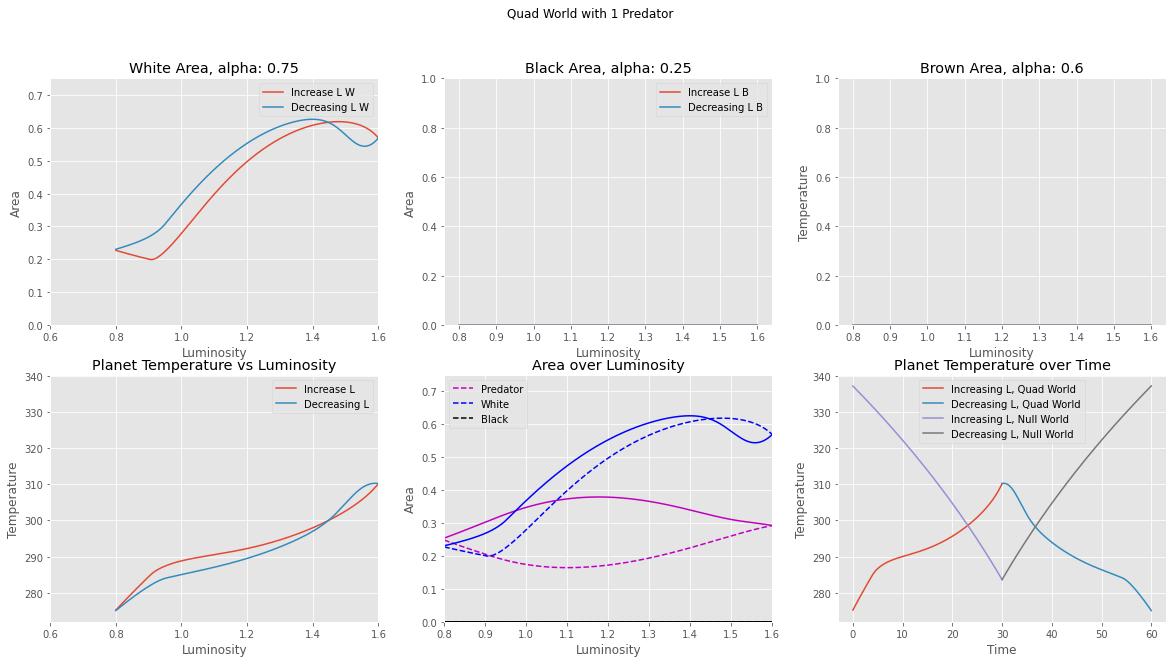

In [ ]:
###########################################################################################################################
#Function for changing Luminosity WHILE simulation is running FOR 4 DAISY PLANET AND ADDING A PREDATOR WITH PREY SWITCHING#
###########################################################################################################################
L = 1.500        # Luminosity
ab = 0.25        # Black Daisy Albedo
aw = 0.75        # White Daisy Albedo
at = 0.4         # Grey daisy albedo?
ag = 0.5         # Ground Albedo
abro = 0.6      # Brown Daisy Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.3      # Death Rate

######################
# Predator Constants #
######################
birth_rate = 0.3
death_rate = 0.1




def fourp_daisies(Apred, Aw,Ab,At,Abro,time,dt,L_sup,L=0.8, aw = aw, ab = ab, at = at, abro = abro):
  L_interval=(L_sup-L)/(time/dt)
  L_list=[]
  time=np.arange(0,time,dt)
  Aw_list=[]
  Ab_list=[]
  At_list = []
  Abro_list = []
  T_list=[] 
  predator_list = []

  def dT_e(A,a_e,ai=aw):
    T_d=((R*S*L/sigma)*(a_e-ai)+T_e**4)**0.25
    b=1-0.003265*(Ti+273.15-T_d)**2
    if b < 0:
      b = 0
    return A*((1-A)*b-gamma)
  
  def dPdT(A, Aw):
    return A*((1-A)*birth_rate*Aw - death_rate)

  for i in time:
    L+=L_interval
    L_list.append(L)

    a_e=Aw*aw+(1-Aw-Ab-At-Abro)*ag+Ab*ab + At*at + Abro*abro
    T_e=(S*L/sigma*(1-a_e))**0.25

    T_list.append(T_e)
    Aw_list.append(Aw)
    Ab_list.append(Ab)
    At_list.append(At)
    Abro_list.append(Abro)
    predator_list.append(Apred)

    #Prey switching logic#
    daisy_dict = {}
    daisy_dict['white'] = Aw
    daisy_dict['black'] = Ab
    daisy_dict['grey'] = At
    daisy_dict['brown'] = Abro
    max_key = max(daisy_dict, key=daisy_dict.get)
    maxAd = max(daisy_dict.values())

    dAwdt=dT_e(Aw, a_e, ai = aw)
    dAbdt=dT_e(Ab, a_e, ai = ab)
    dAtdt=dT_e(At, a_e, ai = at)
    dAbrodt=dT_e(Abro, a_e, ai = abro)
    dApreddt = dPdT(Apred, maxAd)
    prey_change = dApreddt*dt*5

    if max_key == 'white':
      Aw+=dAwdt*dt - prey_change
      Ab+=dAbdt*dt
      At+=dAtdt*dt
      Abro+=dAbrodt*dt 
      Apred+= dApreddt*dt
    
    elif max_key == 'black':
      Aw+=dAwdt*dt
      Ab+=dAbdt*dt - prey_change
      At+=dAtdt*dt
      Abro+=dAbrodt*dt 
      Apred+= dApreddt*dt
    
    elif max_key == 'grey':
      Aw+=dAwdt*dt
      Ab+=dAbdt*dt
      At+=dAtdt*dt - prey_change
      Abro+=dAbrodt*dt 
      Apred+= dApreddt*dt
    
    else:
      Aw+=dAwdt*dt
      Ab+=dAbdt*dt
      At+=dAtdt*dt
      Abro+=dAbrodt*dt - prey_change
      Apred+= dApreddt*dt
    
  return time,predator_list, Aw_list,Ab_list,At_list,Abro_list,T_list,L_list



HL = 1.6
LL = 0.8

time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(0.2,0.5,0,0,0,30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)

time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(Apred_lista[-1],Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)


#Simulate world with no daisies#
timeb,Aw_listb,Ab_listb,T_listb,L_listb = greydaisies(0,0,30,0.01,LL,L=HL)
timec,Aw_listc,Ab_listc,T_listc,L_listc = greydaisies(0,0,30,0.01,HL,L=LL)


fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(20,10))
ax1, ax4, ax2, ax3, ax5, ax6 = axes.ravel()

fig.suptitle('Quad World with 1 Predator')
ax1.plot(L_list, Aw_list, label = "Increase L W")
ax1.plot(L_lista, Aw_lista, label = "Decreasing L W")
#ax1.plot(L_listb, Aw_listb, label = "no flower decreasing L")
ax1.legend()
ax1.set_ylim(0,0.75)
ax1.set_xlim(0.6,HL)
ax1.set_xlabel('Luminosity')
ax1.set_ylabel('Area')
ax1.set_title(f"White Area, alpha: {aw}")

ax3.plot(L_list, T_list, label = "Increase L")
ax3.plot(L_lista, T_lista, label = "Decreasing L")
ax3.legend()
#ax2.set_ylim(10+273,80+273)
ax3.set_xlim(0.6,HL)
ax3.set_xlabel('Luminosity')
ax3.set_ylabel('Temperature')
ax3.set_title('Planet Temperature vs Luminosity')

#At
'''ax2.plot(L_list, At_list, label = "Increase L t")
ax2.plot(L_lista, At_lista, label = "Decreasing L t")
ax2.set_xlabel('Luminosity')
ax2.set_ylabel('Temperature')
ax2.set_title(f"Grey Area, alpha: {at}")'''

#Abrown
ax2.plot(L_list, Abro_list, label = "Increase L t")
ax2.plot(L_lista, Abro_lista, label = "Decreasing L t")
ax2.set_xlabel('Luminosity')
ax2.set_ylabel('Temperature')
ax2.set_title(f"Brown Area, alpha: {abro}")


ax4.plot(L_list, Ab_list, "-", label = "Increase L B")
ax4.plot(L_lista, Ab_lista, "-", label = "Decreasing L B")
ax4.set_xlabel('Luminosity')
ax4.set_ylabel('Area')
ax4.set_title(f"Black Area, alpha: {ab}")

###############################################################
#Plotting graph of actual fluctuation over time as if in orbit#
###############################################################

time = np.array(time)
timea = np.array(timea)

ax5.plot(L_list, Apred_list,'m--', label = 'Predator')
ax5.plot(L_lista, Apred_lista,'m')
#ax5.plot(L_list, At_list, 'g--', label = 'Grey')
#ax5.plot(L_lista, At_lista, 'g') #grey
ax5.plot(L_list, Aw_list, 'b--', label = 'White')
ax5.plot(L_lista, Aw_lista, 'b') #white
ax5.plot(L_list, Ab_list, 'k--', label = 'Black')
ax5.plot(L_lista, Ab_lista, 'k') #black
#ax5.plot(L_list, Abro_list, 'r--', label = 'Brown')
#ax5.plot(L_lista, Abro_lista, 'r') #brown
ax5.legend()
ax5.set_xlim(0.8,1.6)
ax5.set_ylim(0.0,0.75)


ax5.set_title(f"Area over Luminosity")
ax5.set_xlabel('Luminosity')
ax5.set_ylabel("Area")

ax6.plot(time, T_list, label = "Increasing L, Quad World")
ax6.plot(timea+time[-1], T_lista, label = "Decreasing L, Quad World")
ax6.plot(time, T_listb, label = "Increasing L, Null World")
ax6.plot(timea+time[-1], T_listc, label = "Decreasing L, Null World")

ax6.set_title(f"Planet Temperature over Time")
ax6.set_xlabel('Time')
ax6.set_ylabel("Temperature")
ax6.legend()

ax1.get_shared_y_axes().join(ax1, ax4)
ax1.get_shared_y_axes().join(ax1, ax2)
ax6.get_shared_y_axes().join(ax6, ax3)
ax6.get_shared_y_axes().join(ax1, ax5)
ax4.legend()
from google.colab import files
fn = 'Dual World with Pred.png'
plt.savefig(fn, bbox_inches = 'tight', dpi = 300)
files.download(fn)
plt.show()

#STATE SPACE THING


In [ ]:
L = 1.500        # Luminosity
ab = 0.25        # Black Daisy Albedo
aw = 0.75        # White Daisy Albedo
ag = 0.5         # Ground Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.3      # Death Rate


# dA/dt of Black Daisy
def vb(Ab, Aw, L=L):
    ap = Aw*aw + Ab*ab + (1-Aw-Ab)*ag           # Planet Albedo
    Te = (L*(S/sigma)*(1-ap))**0.25             # Planet Temp
    Tb = (R*L*(S/sigma)*(ap-ab)+(Te**4))**0.25  # Black Daisy Temp
    bb = 1-(0.003265*((273.15+Ti)-Tb)**2)       # Black Daisy Growth Rate
    return Ab*((1-Ab-Aw)*bb-gamma)              # Black Daisy Coverage

# dA/dt of White Daisy
def vw(Ab, Aw, L=L):
    ap = Aw*aw + Ab*ab + (1-Aw-Ab)*ag           # Planet Albedo
    Te = (L*(S/sigma)*(1-ap))**0.25             # Planet Temp
    Tw = (R*L*(S/sigma)*(ap-aw)+(Te**4))**0.25  # White Daisy Temp
    bw = 1-(0.003265*((273.15+Ti)-Tw)**2)       # White Daisy Growth Rate
    return Aw*((1-Aw-Ab)*bw-gamma)

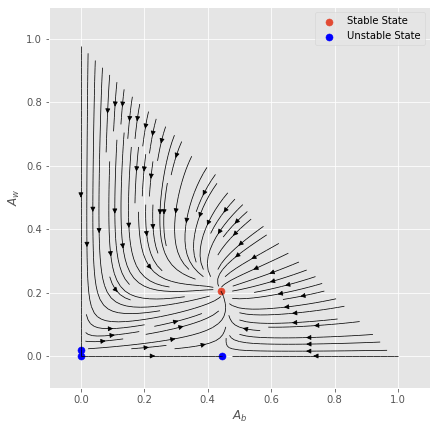

In [ ]:
#######################
# STATE SPACE PICTURE #
#######################
L = 0.865
Aw, Ab = np.mgrid[0:1:100j, 0:1:100j]
velb = vb(Ab, Aw, L=L)
velw = vw(Ab, Aw, L=L)

# Impose Region Constraint (Ab+Aw >= 1)
mask = np.zeros(velw.shape, dtype=bool)
for i in range(len(velw)):
    velw[i, len(velw)-i:] = np.nan
    velw = np.ma.array(velw, mask=mask)

# Streamplot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, adjustable='box', aspect=1)
plt.streamplot(Ab, Aw, velb, velw, color='k',density=1.5, linewidth=0.75)

# Formatting
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$A_b$')
ax.set_ylabel('$A_w$')
plt.scatter([0.44332], [0.20401], s = 50, label =  "Stable State")
plt.scatter([0.0,0.0,0.44572], [0.01938,0.0,0.0], s = 50, label =  "Unstable State", color = 'blue')
plt.legend()
plt.show()

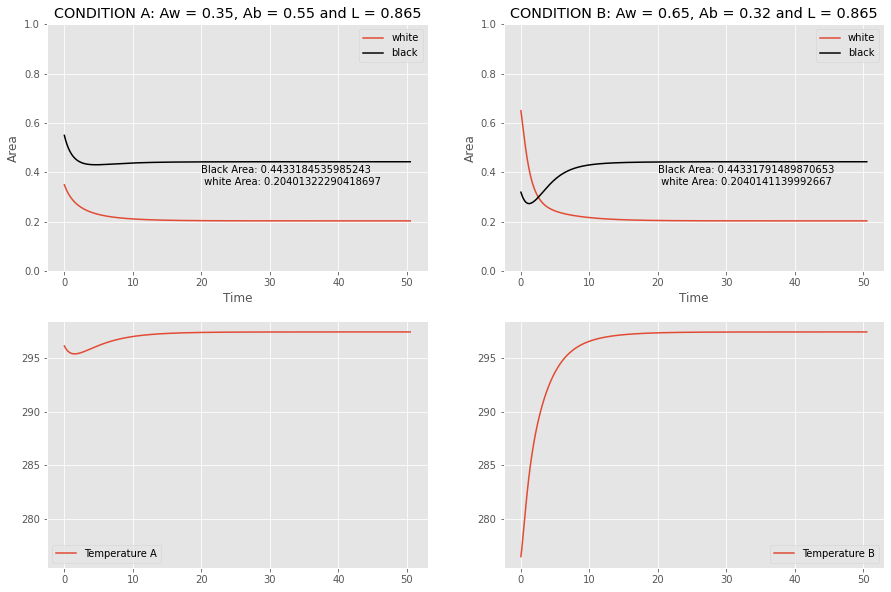

In [ ]:
############################################################################
#PLOT OF BLACK AND WHITE DAISIES REGARDLESS OF AREA (THEY GO TO SAME VALUE #
############################################################################
L = 0.865        # Luminosity

#Stable Solution
A1b, A1w = 0.55, 0.35
A2b, A2w = 0.32, 0.65

#UnStable Solution1
#A1b, A1w = 0.44572, 0.01
#A2b, A2w = 0.44572, 0.0

#UnStable Solution2
#A1b, A1w = 0.01, 0.01938
#A2b, A2w = 0.0, 0.01938

#UnStable Solution3
#A1b, A1w = 0 , 0
#A2b, A2w = 0.0001 , 0.0001


t_lista, Aw_lista, Ab_lista, Te_lista = three_two(L = L, ab = 0.25, aw = 0.75, A0b = A1b, A0w = A1w)
t_listb, Aw_listb, Ab_listb, Te_listb = three_two(L = L, ab = 0.25, aw = 0.75, A0b = A2b, A0w = A2w)


fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(15,10))

ax1, ax2, ax3, ax4 = axes.ravel()

ax1.plot(t_lista, Aw_lista, label = "white")
ax1.plot(t_lista, Ab_lista, label = "black", color = 'k')
ax1.legend()
ax1.set_xlabel('Time')
ax1.set_ylabel('Area')
ax1.set_title(f"CONDITION A: Aw = {A1w}, Ab = {A1b} and L = {L}")
ax1.text(20,0.35, f"Black Area: {Ab_lista[-1]}\n white Area: {Aw_lista[-1]}")
ax1.set_ylim(0,1)
ax2.plot(t_listb, Aw_listb, label = "white")
ax2.plot(t_listb, Ab_listb, label = "black", color = 'k')
ax2.legend()
ax2.set_xlabel('Time')
ax2.set_ylabel('Area')
ax2.set_title(f"CONDITION B: Aw = {A2w}, Ab = {A2b} and L = {L}")
ax2.text(20,0.35, f"Black Area: {Ab_listb[-1]}\n white Area: {Aw_listb[-1]}")
ax2.set_ylim(0,1)
ax3.plot(t_lista, Te_lista, label = "Temperature A")
ax3.legend()

ax4.plot(t_listb, Te_listb, label = "Temperature B")
ax4.legend()

ax1.get_shared_y_axes().join(ax1, ax2)
ax3.get_shared_y_axes().join(ax3, ax4)

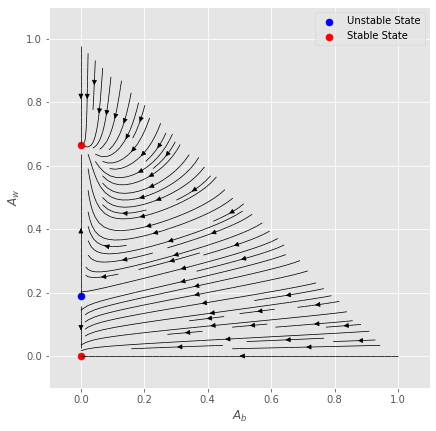

In [ ]:
#######################
# STATE SPACE PICTURE #
#######################
L = 1.378
Aw, Ab = np.mgrid[0:1:100j, 0:1:100j]
velb = vb(Ab, Aw, L=L)
velw = vw(Ab, Aw, L=L)

# Impose Region Constraint (Ab+Aw >= 1)
mask = np.zeros(velw.shape, dtype=bool)
for i in range(len(velw)):
    velw[i, len(velw)-i:] = np.nan
    velw = np.ma.array(velw, mask=mask)

# Streamplot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, adjustable='box', aspect=1)
plt.streamplot(Ab, Aw, velb, velw, color='k',density=1.5, linewidth=0.75)

# Formatting
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$A_b$')
ax.set_ylabel('$A_w$')
plt.scatter([0.0], [0.19046], s = 50, label =  "Unstable State", color = 'blue')
plt.scatter([0.0,0.0], [0.66435,0.0], s = 50, label =  "Stable State", color = 'red')
plt.legend()

plt.show()

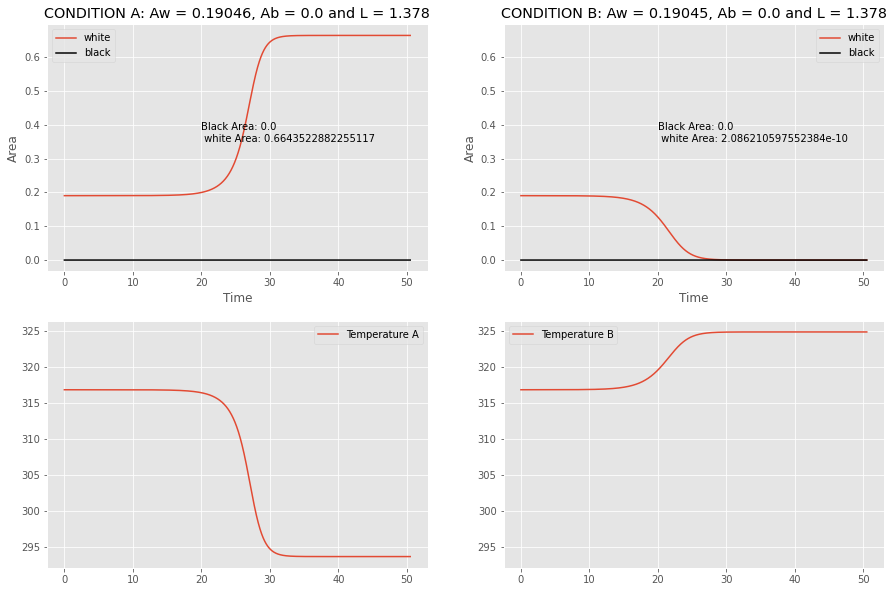

In [ ]:
######################################################################################################
# PLOT OF DAISY WORLD WHEN IT IS UNSTABLE AF. CHANGING A LIL OF THE STARTING POINT IS NEW EQUILBRIUM #
######################################################################################################
L = 1.378        # Luminosity
#Unstable Solution#
A1b, A1w = 0.0, 0.19046
A2b, A2w = 0.0, 0.19045

#Stable Solution#
#A1b, A1w = 0.1, 0.66435
#A2b, A2w = 0.1, 0.15

t_lista, Aw_lista, Ab_lista, Te_lista = three_two(L = L, ab = 0.25, aw = 0.75, A0b = A1b, A0w = A1w)
t_listb, Aw_listb, Ab_listb, Te_listb = three_two(L = L, ab = 0.25, aw = 0.75, A0b = A2b, A0w = A2w)


fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(15,10))

ax1, ax2, ax3, ax4 = axes.ravel()

ax1.plot(t_lista, Aw_lista, label = "white")
ax1.plot(t_lista, Ab_lista, label = "black", color = 'k')
ax1.legend()
ax1.set_xlabel('Time')
ax1.set_ylabel('Area')
ax1.set_title(f"CONDITION A: Aw = {A1w}, Ab = {A1b} and L = {L}")
ax1.text(20,0.35, f"Black Area: {Ab_lista[-1]}\n white Area: {Aw_lista[-1]}")
ax2.plot(t_listb, Aw_listb, label = "white")
ax2.plot(t_listb, Ab_listb, label = "black", color = 'k')
ax2.legend()
ax2.set_xlabel('Time')
ax2.set_ylabel('Area')
ax2.set_title(f"CONDITION B: Aw = {A2w}, Ab = {A2b} and L = {L}")
ax2.text(20,0.35, f"Black Area: {Ab_listb[-1]}\n white Area: {Aw_listb[-1]}")
ax3.plot(t_lista, Te_lista, label = "Temperature A")
ax3.legend()

ax4.plot(t_listb, Te_listb, label = "Temperature B")
ax4.legend()

ax1.get_shared_y_axes().join(ax1, ax2)
ax3.get_shared_y_axes().join(ax3, ax4)

#EXTRA QUESTIONS


In [ ]:
 #############################################
#                                           #
#              EXTRA QUESTIONS              #
#                                           #
#############################################

'''
1. Explain how the temperature is regulated and how the daisy coverage varies when
the luminosity of the star increases (i.e. explain the graphs Ai=f(L) and Te=f(L)).
What happens when the initial coverage of black and white daisies are different ?
(choose 2 extreme cases).


2. Using only the Daisyworld model, explain the impact on Earth of the expansion
of boreal forests at high latitudes. Is there any other effects (not considered in
the model) to take into account to assess the impact of boreal forest expansion on
Earth temperature?


3. Let’s say that daisies from the Daisyworld come to Earth and can grow anywhere
(rocks, oceans...).
a) Which daisies would be predominantly growing at high latitudes and at low
latitudes? explain briefly.
b) What will be the impact on the temperature difference between the equator
and the poles? what are the consequences on the wind circulation?


4. What is the effect of biodiversity on Daisyworld?


5. What is the impact of changing the difference in albedo (αb−αw) in the Daisyworld
model? What about changing The optimum temperature?


6. Explain the hysteresis for the white daisy planet.


7. Do you think the model prove that life control its environment in order to make
it habitable?


8. Over billions of years, the sun luminosity has increased but life has survived. Why?
Give different reasons (all possible feedback mechanisms).


9. To which extent can the Daisyworld model be used to explain the stability of Earth
and life despite the perturbations.


10. Would planet homeostasis remain with adaptation and natural selection? Why?












'''

'\n1. Explain how the temperature is regulated and how the daisy coverage varies when\nthe luminosity of the star increases (i.e. explain the graphs Ai=f(L) and Te=f(L)).\nWhat happens when the initial coverage of black and white daisies are different ?\n(choose 2 extreme cases).\n\n\n2. Using only the Daisyworld model, explain the impact on Earth of the expansion\nof boreal forests at high latitudes. Is there any other effects (not considered in\nthe model) to take into account to assess the impact of boreal forest expansion on\nEarth temperature?\n\n\n3. Let’s say that daisies from the Daisyworld come to Earth and can grow anywhere\n(rocks, oceans...).\na) Which daisies would be predominantly growing at high latitudes and at low\nlatitudes? explain briefly.\nb) What will be the impact on the temperature difference between the equator\nand the poles? what are the consequences on the wind circulation?\n\n\n4. What is the effect of biodiversity on Daisyworld?\n\n\n5. What is the impact 

#Planet Temp Graphs against increasing daisies



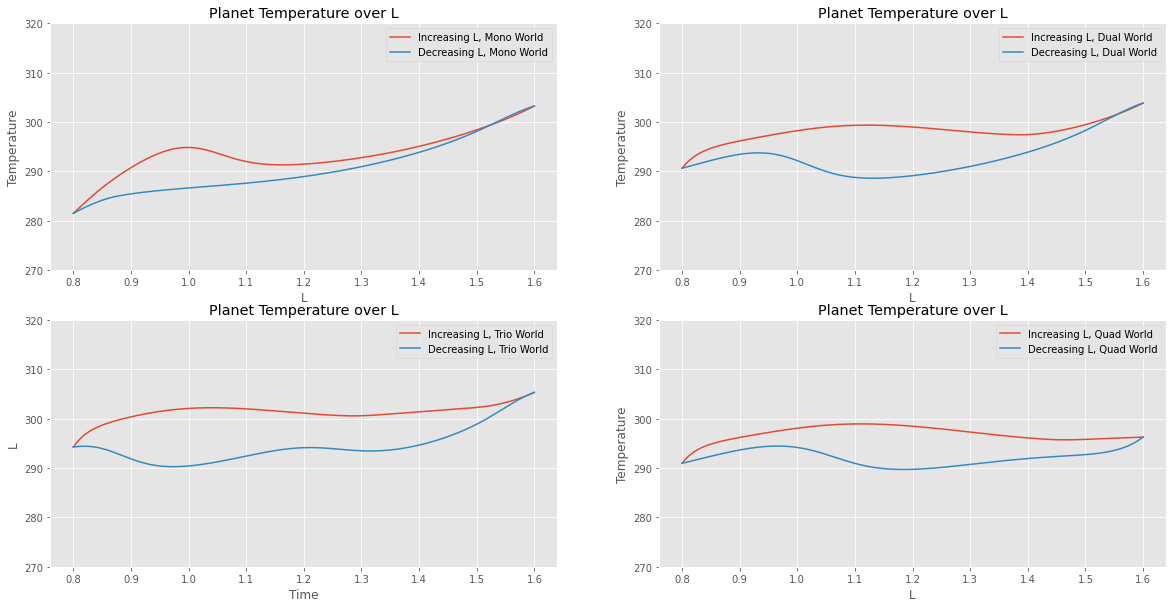

In [ ]:
#################################################
#Planet Temperature Graphs as I add more Daisies#
#################################################

HL = 1.6
LL = 0.8

#Mono#
time,A_list,T_list,L_list = whiteroses(1,30,0.01,HL,L=LL)
timea,A_lista,T_lista,L_lista = whiteroses(A_list[-1],30,0.01,LL,L=HL)

time,A_list,T_list,L_list = whiteroses(A_lista[-1],30,0.01,HL,L=LL)
timea,A_lista,T_lista,L_lista = whiteroses(A_list[-1],30,0.01,LL,L=HL)

fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(20,10))
ax1, ax2, ax3, ax4 = axes.ravel()
time = np.array(time)
timea = np.array(timea)
ax1.plot(L_list, T_list, label = "Increasing L, Mono World")
ax1.plot(L_lista, T_lista, label = "Decreasing L, Mono World")
ax1.set_title(f"Planet Temperature over L")
ax1.set_xlabel('L')
ax1.set_ylabel("Temperature")
ax1.legend()


#DUAL#

time,Aw_list,Ab_list,T_list,L_list = greydaisies(0.5,0.5,30,0.01,HL,L=LL)
timea,Aw_lista,Ab_lista,T_lista,L_lista = greydaisies(Aw_list[-1],Ab_list[-1],30,0.01,LL,L=HL)
time,Aw_list,Ab_list,T_list,L_list = greydaisies(Aw_lista[-1],Ab_lista[-1],30,0.01,HL,L=LL)
timea,Aw_lista,Ab_lista,T_lista,L_lista = greydaisies(Aw_list[-1],Ab_list[-1],30,0.01,LL,L=HL)
time = np.array(time)
timea = np.array(timea)
ax2.plot(L_list, T_list, label = "Increasing L, Dual World")
ax2.plot(L_lista, T_lista, label = "Decreasing L, Dual World")
ax2.set_title(f"Planet Temperature over L")
ax2.set_xlabel('L')
ax2.set_ylabel("Temperature")
ax2.legend()


#Trio#
time,Aw_list,Ab_list,At_list,T_list,L_list = Three_daisies(0.33,0.33,0.34,30,0.01,HL,L=LL)
timea,Aw_lista,Ab_lista,At_lista,T_lista,L_lista = Three_daisies(Aw_list[-1],Ab_list[-1],At_list[-1],30,0.01,LL,L=HL)
time,Aw_list,Ab_list,At_list,T_list,L_list = Three_daisies(Aw_lista[-1],Ab_lista[-1],At_lista[-1],30,0.01,HL,L=LL)
timea,Aw_lista,Ab_lista,At_lista,T_lista,L_lista = Three_daisies(Aw_list[-1],Ab_list[-1],At_list[-1],30,0.01,LL,L=HL)
time = np.array(time)
timea = np.array(timea)
ax3.plot(L_list, T_list, label = "Increasing L, Trio World")
ax3.plot(L_lista, T_lista, label = "Decreasing L, Trio World")
ax3.set_title(f"Planet Temperature over L")
ax3.set_xlabel('Time')
ax3.set_ylabel("L")
ax3.legend()


#QUAD#
time,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = four_daisies(0.25,0.25,0.25,0.25,30,0.01,HL,L=LL)
timea,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = four_daisies(Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)
time,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = four_daisies(Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
timea,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = four_daisies(Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)
time = np.array(time)
timea = np.array(timea)
ax4.plot(L_list, T_list, label = "Increasing L, Quad World")
ax4.plot(L_lista, T_lista, label = "Decreasing L, Quad World")
ax4.set_title(f"Planet Temperature over L")
ax4.set_xlabel('L')
ax4.set_ylabel("Temperature")
ax4.legend()


ax1.set_ylim(270,320)
ax2.set_ylim(270,320)
ax3.set_ylim(270,320)
ax4.set_ylim(270,320)

from google.colab import files
fn = 'Te Over L _ expand Hy no pred.png'
plt.savefig(fn, bbox_inches = 'tight', dpi = 300)
#files.download(fn)

plt.show()

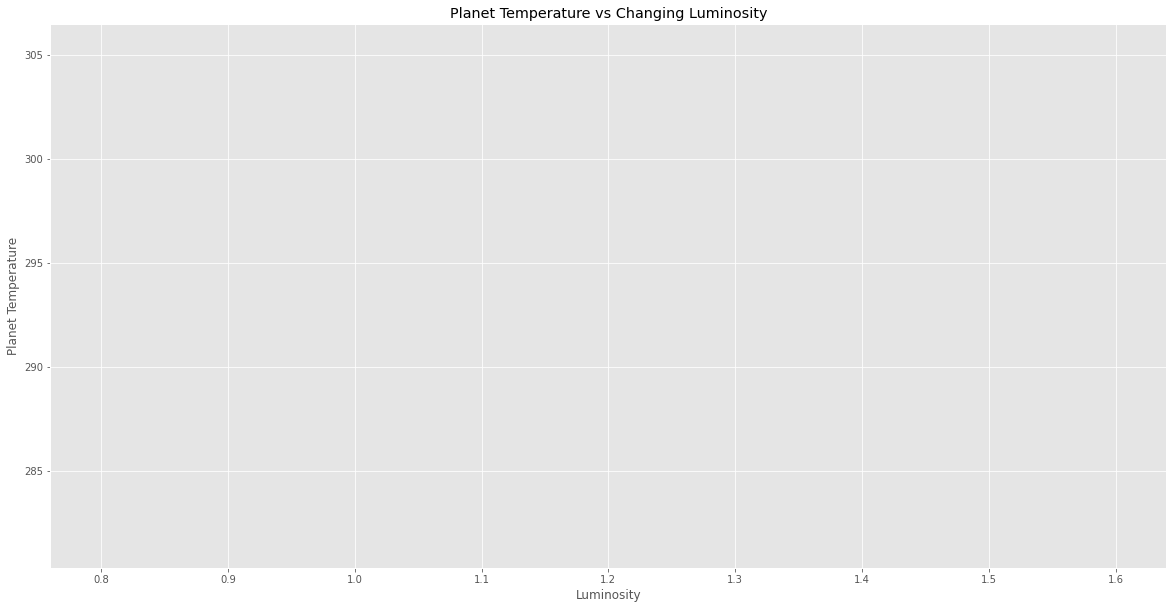

In [ ]:
#################################################
#Planet Temperature Graphs as I add more Daisies#
#################################################
% pip install celluloid
from celluloid import Camera
fig = plt.figure(figsize = (20,10))
camera = Camera(fig)
plt.xlabel('Luminosity')
plt.ylabel('Planet Temperature')
plt.title("Planet Temperature vs Changing Luminosity")
for i in range(5):

  HL = 1.6
  LL = 0.8

  #Mono#
  time,A_list,T_list,L_list = whiteroses(1,30,0.01,HL,L=LL)
  timea,A_lista,T_lista,L_lista = whiteroses(A_list[-1],30,0.01,LL,L=HL)

  time,A_list,T_list,L_list = whiteroses(A_lista[-1],30,0.01,HL,L=LL)
  timea,A_lista,T_lista,L_lista = whiteroses(A_list[-1],30,0.01,LL,L=HL)

  #fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(20,10))
  #3ax1, ax2, ax3, ax4 = axes.ravel()
  time = np.array(time)
  timea = np.array(timea)
  #ax1.plot(L_list, T_list, label = "Increasing L, Mono World")
  #ax1.plot(L_lista, T_lista, label = "Decreasing L, Mono World")
  #ax1.set_title(f"Planet Temperature over L")
  #ax1.set_xlabel('L')
  #ax1.set_ylabel("Temperature")
  #ax1.legend()


  t = plt.plot(L_list,T_list, color = 'r')
  z = plt.plot(L_lista,T_lista, color = 'b' )
  plt.legend(t, ['1 daisy'],prop={'size': 15})
  camera.snap()

  #DUAL#

  time,Aw_list,Ab_list,T_list,L_list = greydaisies(0.5,0.5,30,0.01,HL,L=LL)
  timea,Aw_lista,Ab_lista,T_lista,L_lista = greydaisies(Aw_list[-1],Ab_list[-1],30,0.01,LL,L=HL)
  time,Aw_list,Ab_list,T_list,L_list = greydaisies(Aw_lista[-1],Ab_lista[-1],30,0.01,HL,L=LL)
  timea,Aw_lista,Ab_lista,T_lista,L_lista = greydaisies(Aw_list[-1],Ab_list[-1],30,0.01,LL,L=HL)
  time = np.array(time)
  timea = np.array(timea)
  #ax2.plot(L_list, T_list, label = "Increasing L, Dual World")
  #ax2.plot(L_lista, T_lista, label = "Decreasing L, Dual World")
  #ax2.set_title(f"Planet Temperature over L")
  #ax2.set_xlabel('L')
  #ax2.set_ylabel("Temperature")
  #ax2.legend()

  t = plt.plot(L_list,T_list, color = 'r')
  z = plt.plot(L_lista,T_lista, color = 'b' )
  plt.legend(t, ['2 daisies'],prop={'size': 15})
  camera.snap()

  #Trio#
  time,Aw_list,Ab_list,At_list,T_list,L_list = Three_daisies(0.33,0.33,0.34,30,0.01,HL,L=LL)
  timea,Aw_lista,Ab_lista,At_lista,T_lista,L_lista = Three_daisies(Aw_list[-1],Ab_list[-1],At_list[-1],30,0.01,LL,L=HL)
  time,Aw_list,Ab_list,At_list,T_list,L_list = Three_daisies(Aw_lista[-1],Ab_lista[-1],At_lista[-1],30,0.01,HL,L=LL)
  timea,Aw_lista,Ab_lista,At_lista,T_lista,L_lista = Three_daisies(Aw_list[-1],Ab_list[-1],At_list[-1],30,0.01,LL,L=HL)
  time = np.array(time)
  timea = np.array(timea)
  #ax3.plot(L_list, T_list, label = "Increasing L, Trio World")
  #ax3.plot(L_lista, T_lista, label = "Decreasing L, Trio World")
  #x3.set_title(f"Planet Temperature over L")
  #ax3.set_xlabel('Time')
  #ax3.set_ylabel("L")
  #ax3.legend()

  t = plt.plot(L_list,T_list, color = 'r')
  z = plt.plot(L_lista,T_lista, color = 'b' )
  plt.legend(t, ['3 daisies'],prop={'size': 15})
  camera.snap()

  #QUAD#
  time,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = four_daisies(0.25,0.25,0.25,0.25,30,0.01,HL,L=LL)
  timea,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = four_daisies(Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)
  time,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = four_daisies(Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
  timea,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = four_daisies(Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)
  time = np.array(time)
  timea = np.array(timea)
  #ax4.plot(L_list, T_list, label = "Increasing L, Quad World")
  #ax4.plot(L_lista, T_lista, label = "Decreasing L, Quad World")
  #ax4.set_title(f"Planet Temperature over L")
  #ax4.set_xlabel('L')
  #ax4.set_ylabel("Temperature")
  #ax4.legend()

  t = plt.plot(L_list,T_list, color = 'r')
  z = plt.plot(L_lista,T_lista, color = 'b' )
  plt.legend(t, ['4 daisies'],prop={'size': 15})
  camera.snap()

  #ax1.set_ylim(270,320)
  #ax2.set_ylim(270,320)
  #ax3.set_ylim(270,320)
  #ax4.set_ylim(270,320)

animation = camera.animate(interval = 1000)
animation.save('animation no pred.mp4')
plt.show()

plt.show()

#Pred Te Graphs

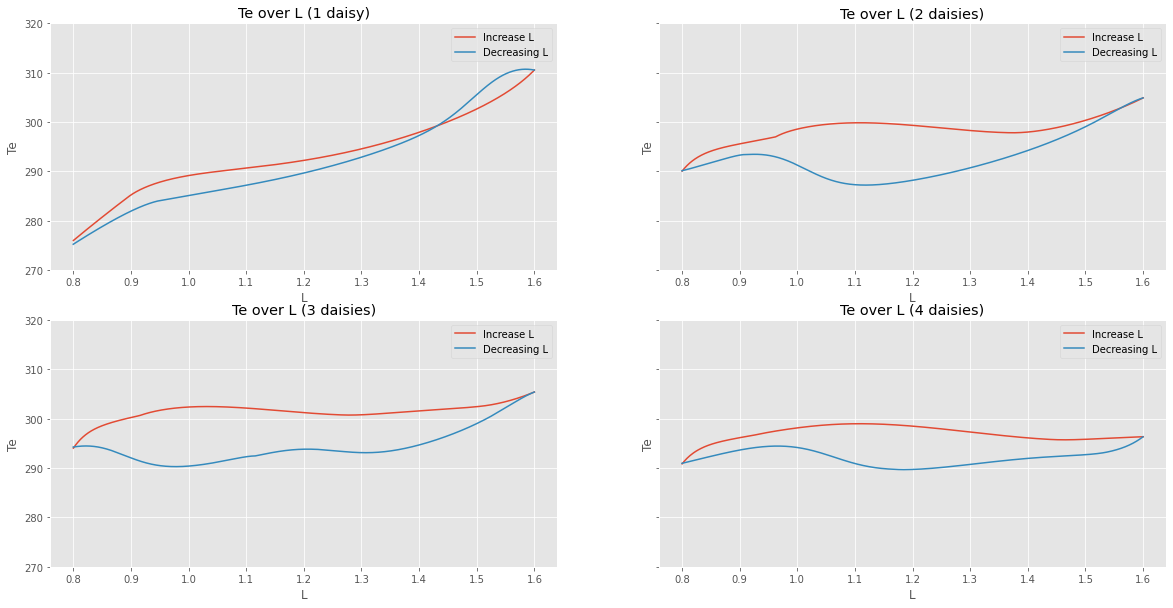

In [ ]:
#######################################################################################################
#Function for changing Luminosity WHILE simulation is running FOR 4 DAISY PLANET AND ADDING A PREDATOR#
#######################################################################################################

HL = 1.6
LL = 0.8

time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(0.1,0.5,0,0,0,30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)
time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(Apred_lista[-1],Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)

fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(20,10),sharey=True)
ax1, ax2, ax3, ax4 = axes.ravel()
time = np.array(time)
timea = np.array(timea)
ax1.plot(L_list, T_list, label = "Increase L")
ax1.plot(L_lista, T_lista, label = "Decreasing L")
ax1.set_title(f"Te over L (1 daisy)")
ax1.set_xlabel('L')
ax1.set_ylabel("Te")


time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(0.1,0.25,0.25,0,0,30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)
time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(Apred_lista[-1],Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)

time = np.array(time)
timea = np.array(timea)
ax2.plot(L_list, T_list, label = "Increase L")
ax2.plot(L_lista, T_lista, label = "Decreasing L")
ax2.set_title(f"Te over L (2 daisies)")
ax2.set_xlabel('L')
ax2.set_ylabel("Te")


time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(0.1,0.167,0.167,0.167,0,30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)
time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(Apred_lista[-1],Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)


time = np.array(time)
timea = np.array(timea)
ax3.plot(L_list, T_list, label = "Increase L")
ax3.plot(L_lista, T_lista, label = "Decreasing L")
ax3.set_title(f"Te over L (3 daisies)")
ax3.set_xlabel('L')
ax3.set_ylabel("Te")

time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(0.1,0.125,0.125,0.125,0.125,30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)
time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(Apred_lista[-1],Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)


time = np.array(time)
timea = np.array(timea)
ax4.plot(L_list, T_list, label = "Increase L")
ax4.plot(L_lista, T_lista, label = "Decreasing L")
ax4.set_title(f"Te over L (4 daisies)")
ax4.set_xlabel('L')
ax4.set_ylabel("Te")
ax1.set_ylim(270,320)
ax2.set_ylim(270,320)
ax3.set_ylim(270,320)
ax4.set_ylim(270,320)
ax4.legend()
ax3.legend()
ax2.legend()
ax1.legend()

from google.colab import files
fn = 'Te Over L _ expand Hy with pred.png'
plt.savefig(fn, bbox_inches = 'tight')
#files.download(fn)



plt.show()

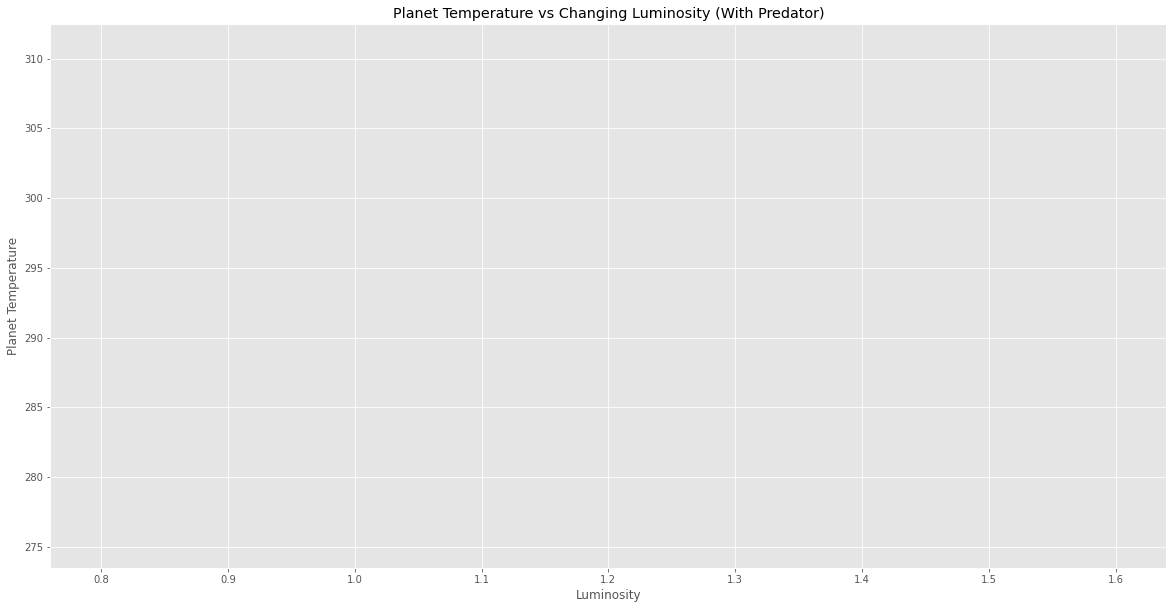

In [ ]:
#######################################################################################################
#Function for changing Luminosity WHILE simulation is running FOR 4 DAISY PLANET AND ADDING A PREDATOR#
#######################################################################################################
% pip install celluloid
from celluloid import Camera
fig = plt.figure(figsize = (20,10))
camera = Camera(fig)
plt.xlabel('Luminosity')
plt.ylabel('Planet Temperature')
plt.title("Planet Temperature vs Changing Luminosity (With Predator)")

for i in range(5):
  HL = 1.6
  LL = 0.8

  time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(0.1,0.5,0,0,0,30,0.01,HL,L=LL)
  timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)
  time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(Apred_lista[-1],Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
  timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)


  time = np.array(time)
  timea = np.array(timea)
  #plt.plot(L_list, T_list, label = "Increase L")
  #plt.plot(L_lista, T_lista, label = "Decreasing L")
  #plt.set_title(f"Te over L (1 daisy)")
  #plt.set_xlabel('L')
  #plt.set_ylabel("Te")

  t = plt.plot(L_list,T_list, color = 'r')
  z = plt.plot(L_lista,T_lista, color = 'b' )
  plt.legend(t, ['1 daisy'],prop={'size': 15})
  camera.snap()


  time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(0.1,0.25,0.25,0,0,30,0.01,HL,L=LL)
  timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)
  time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(Apred_lista[-1],Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
  timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)

  time = np.array(time)
  timea = np.array(timea)
  #ax2.plot(L_list, T_list, label = "Increase L")
  #ax2.plot(L_lista, T_lista, label = "Decreasing L")
  #ax2.set_title(f"Te over L (2 daisies)")
  #ax2.set_xlabel('L')
  #ax2.set_ylabel("Te")

  t = plt.plot(L_list,T_list, color = 'r')
  z = plt.plot(L_lista,T_lista, color = 'b' )
  plt.legend(t, ['2 daisies'],prop={'size': 15})
  camera.snap()

  time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(0.1,0.167,0.167,0.167,0,30,0.01,HL,L=LL)
  timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)
  time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(Apred_lista[-1],Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
  timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)


  time = np.array(time)
  timea = np.array(timea)
  #ax3.plot(L_list, T_list, label = "Increase L")
  #ax3.plot(L_lista, T_lista, label = "Decreasing L")
  #ax3.set_title(f"Te over L (3 daisies)")
  #ax3.set_xlabel('L')
  #ax3.set_ylabel("Te")
  t = plt.plot(L_list,T_list, color = 'r')
  z = plt.plot(L_lista,T_lista, color = 'b' )
  plt.legend(t, ['3 daisies'],prop={'size': 15})
  camera.snap()

  time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(0.1,0.125,0.125,0.125,0.125,30,0.01,HL,L=LL)
  timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)
  time,Apred_list,Aw_list,Ab_list,At_list,Abro_list,T_list,L_list = fourp_daisies(Apred_lista[-1],Aw_lista[-1],Ab_lista[-1],At_lista[-1],Abro_lista[-1],30,0.01,HL,L=LL)
  timea,Apred_lista,Aw_lista,Ab_lista,At_lista,Abro_lista,T_lista,L_lista = fourp_daisies(Apred_list[-1],Aw_list[-1],Ab_list[-1],At_list[-1],Abro_list[-1],30,0.01,LL,L=HL)


  time = np.array(time)
  timea = np.array(timea)
  #ax4.plot(L_list, T_list, label = "Increase L")
  #ax4.plot(L_lista, T_lista, label = "Decreasing L")
  #ax4.set_title(f"Te over L (4 daisies)")
  #ax4.set_xlabel('L')
  #ax4.set_ylabel("Te")

  t = plt.plot(L_list,T_list, color = 'r')
  z = plt.plot(L_lista,T_lista, color = 'b' )
  plt.legend(t, ['4 daisies'],prop={'size': 15})
  camera.snap()

#ax1.set_ylim(270,320)
#ax2.set_ylim(270,320)
#ax3.set_ylim(270,320)
#ax4.set_ylim(270,320)
#ax4.legend()
#ax3.legend()
#ax2.legend()
#ax1.legend()

from google.colab import files
fn = 'Te Over L _ expand Hy with pred.png'
plt.savefig(fn, bbox_inches = 'tight')
#files.download(fn)


animation = camera.animate(interval = 1000)
animation.save('animation.mp4')
plt.show()